# **Import Libraries**

In [160]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns

In [161]:
pd.set_option('display.max_columns', None)

# **Import Dataset**

In [162]:
df_final=pd.read_csv('/content/drive/MyDrive/P4/df_final.csv',sep=",")
df_final

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
0,1,Hotel,DOWNTOWN,89,1.0,12,88434,88434,88434.0,60.0,7.226362e+06,249.98,15.793246,5.521381
1,2,Hotel,DOWNTOWN,20,1.0,11,103566,88502,83880.0,61.0,8.387933e+06,295.86,15.942305,5.689886
2,3,Hotel,DOWNTOWN,47,1.0,41,956110,759392,756493.0,43.0,7.258702e+07,2089.28,18.100297,7.644575
3,5,Hotel,DOWNTOWN,90,1.0,10,61320,61320,61320.0,56.0,6.794584e+06,286.43,15.731636,5.657494
4,8,Hotel,DOWNTOWN,36,1.0,18,175580,113580,123445.0,75.0,1.417261e+07,505.01,16.466822,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
997,50069,Small- and Mid-Sized Office,GREATER DUWAMISH,87,1.0,2,24990,24990,24990.0,9.0,4.420650e+06,134.80,15.301797,4.903792
998,50081,K-12 School,GREATER DUWAMISH,1,1.0,3,45000,45000,45728.0,77.0,1.325973e+06,9.24,14.097657,2.223542
999,50210,Office,MAGNOLIA / QUEEN ANNE,64,1.0,1,13661,13661,13661.0,75.0,5.026677e+05,3.50,13.127685,1.252763
1000,50220,Office,SOUTHEAST,56,1.0,1,15398,15398,15398.0,93.0,3.878100e+05,7.79,12.868271,2.052841


# **3. Pre-Modelling**

In [163]:
#les émissions de CO2
target1 = ['TotalGHGEmissions_log']

#la consommation totale d’énergie
target2 = ['SiteEnergyUse(kBtu)_log']

## 3.1 Categorical Features

In [164]:
cols_cat = ['PrimaryPropertyType', 'Neighborhood']

In [165]:
for i in range(len(cols_cat)):
  x = df_final[cols_cat[i]].unique()
  print('Column', cols_cat[i], "contains: \n", x, "\n")

Column PrimaryPropertyType contains: 
 ['Hotel' 'Other' 'Small- and Mid-Sized Office' 'K-12 School'
 'Large Office' 'Senior Care Community' 'Medical Office' 'Retail Store'
 'Hospital' 'Residence Hall' 'Warehouse' 'Worship Facility'
 'Mixed Use Property' 'Supermarket / Grocery Store' 'Distribution Center'
 'Refrigerated Warehouse' 'Low-Rise Multifamily' 'Office'] 

Column Neighborhood contains: 
 ['DOWNTOWN' 'NORTHEAST' 'BALLARD' 'GREATER DUWAMISH' 'NORTHWEST'
 'LAKE UNION' 'MAGNOLIA / QUEEN ANNE' 'EAST' 'CENTRAL' 'SOUTHWEST'
 'SOUTHEAST' 'NORTH' 'DELRIDGE' 'Delridge' 'Ballard' 'Northwest' 'North'
 'Central'] 



### Neighborhood

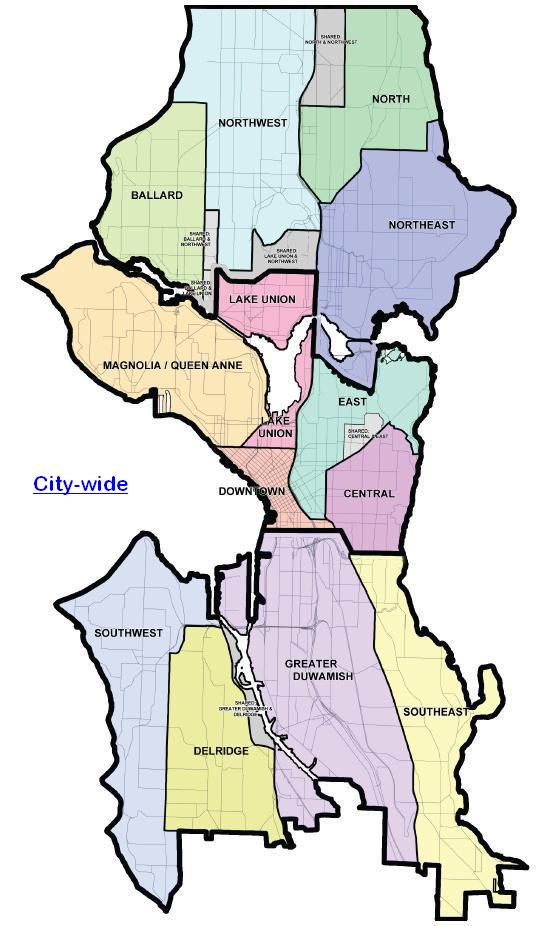

In [166]:
df_final['Neighborhood'] = df_final['Neighborhood'].str.upper()
df_final['Neighborhood'].unique()

array(['DOWNTOWN', 'NORTHEAST', 'BALLARD', 'GREATER DUWAMISH',
       'NORTHWEST', 'LAKE UNION', 'MAGNOLIA / QUEEN ANNE', 'EAST',
       'CENTRAL', 'SOUTHWEST', 'SOUTHEAST', 'NORTH', 'DELRIDGE'],
      dtype=object)

I divided Seattle into three parts:
* NORTH:'BALLARD', 'NORTHWEST', 'NORTH', 'NORTHEAST'.

* CENTRAL:'MAGNOLIA / QUEEN ANNE', 'LAKE UNION', 'EAST', 'CENTRAL', 'DOWNTOWN'.

* SOUTH: 'SOUTHWEST', 'DELRIDGE', 'GREATER DUWAMISH', 'SOUTHEAST'.

In [167]:
REPLACEMENTS_Neighborhood = [
    ('BALLARD', "NORTH"),
    ('NORTHWEST', "NORTH"),
    ('NORTHEAST', "NORTH"),
    ('MAGNOLIA / QUEEN ANNE', "CENTRAL"),
    ('LAKE UNION', "CENTRAL"),
    ('EAST', "CENTRAL"),
    ('DOWNTOWN', "CENTRAL"),
    ('SOUTHWEST', "SOUTH"),
    ('DELRIDGE', "SOUTH"),
    ('GREATER DUWAMISH', "SOUTH"),
    ('SOUTHEAST', "SOUTH")
]

In [168]:
for old, new in REPLACEMENTS_Neighborhood:
    df_final['Neighborhood'] = df_final['Neighborhood'].replace(old, new)

df_final['Neighborhood'].unique()

array(['CENTRAL', 'NORTH', 'SOUTH'], dtype=object)

### PrimaryPropertyType

In [169]:
df_final[df_final['PrimaryPropertyType']=='Low-Rise Multifamily']

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
422,19445,Low-Rise Multifamily,CENTRAL,16,1.0,3,93079,56986,91064.0,32.0,1997181.5,25.6,14.507247,3.242592


In [170]:
df_final[df_final['PrimaryPropertyType']=='Residence Hall']

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
57,183,Residence Hall,CENTRAL,15,1.0,4,139600,102100,135520.0,89.0,4.448582e+06,129.39,15.308096,4.862831
81,294,Residence Hall,CENTRAL,103,1.0,9,107572,107572,63934.0,76.0,5.572503e+06,254.87,15.533355,5.540754
462,20029,Residence Hall,NORTH,95,1.0,3,21499,21499,21499.0,85.0,6.051307e+05,4.22,13.313200,1.439835
481,20273,Residence Hall,NORTH,23,1.0,3,28572,28572,22000.0,16.0,2.717863e+06,89.57,14.815357,4.495020
482,20323,Residence Hall,CENTRAL,34,0.0,15,115775,84240,150000.0,94.0,2.882490e+06,20.09,14.874165,3.000222
515,20861,Residence Hall,CENTRAL,28,1.0,3,21118,21118,21118.0,49.0,1.361428e+06,39.50,14.124045,3.676301
559,21262,Residence Hall,CENTRAL,107,1.0,4,29796,29796,29796.0,47.0,2.233262e+06,79.58,14.618974,4.376763
683,23297,Residence Hall,CENTRAL,112,1.0,1,44086,44086,44091.0,29.0,3.652709e+06,184.00,15.110980,5.214936
898,26906,Residence Hall,NORTH,87,1.0,3,22124,22124,22124.0,82.0,6.376850e+05,4.45,13.365600,1.492904
899,26909,Residence Hall,NORTH,90,1.0,3,27487,27487,27487.0,82.0,1.594505e+06,65.95,14.282074,4.188897


'Low-Rise Multifamily' and ''Residence Hall' are actually residential. Therefore, I deleted them from my table.

In [171]:
df_final = df_final.drop(df_final[(df_final['PrimaryPropertyType']=='Low-Rise Multifamily') | (df_final['PrimaryPropertyType']=='Residence Hall')].index)
df_final.reset_index(drop=True,inplace=True)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 14 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              982 non-null    int64  
 1   PrimaryPropertyType        982 non-null    object 
 2   Neighborhood               982 non-null    object 
 3   BuildingAge                982 non-null    int64  
 4   NumberofBuildings          982 non-null    float64
 5   NumberofFloors             982 non-null    int64  
 6   PropertyGFATotal           982 non-null    int64  
 7   PropertyGFABuilding(s)     982 non-null    int64  
 8   LargestPropertyUseTypeGFA  982 non-null    float64
 9   ENERGYSTARScore            982 non-null    float64
 10  SiteEnergyUse(kBtu)        982 non-null    float64
 11  TotalGHGEmissions          982 non-null    float64
 12  SiteEnergyUse(kBtu)_log    982 non-null    float64
 13  TotalGHGEmissions_log      982 non-null    float64

In [172]:
df_final_groupby_sum = df_final.groupby(['PrimaryPropertyType'],as_index=False).sum().sort_values(by=['SiteEnergyUse(kBtu)'], ascending=False)
df_final_groupby_sum

The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.


,PrimaryPropertyType,OSEBuildingID,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
4,Large Office,679899,6379,164.0,2228,59425916,49088000,45162909.0,12562.0,2.779289e+09,32773.38,2665.065023,797.174357
1,Hospital,150730,409,43.0,69,6213004,6062549,6833275.0,481.0,1.415470e+09,50529.63,182.451224,77.730637
2,Hotel,593358,3651,72.0,681,10934957,9251214,9690831.0,4414.0,8.294449e+08,27025.79,1132.898496,380.841429
12,Small- and Mid-Sized Office,4105664,14835,230.0,787,11007821,9999224,9392528.0,15931.0,6.078209e+08,9196.69,3420.016631,757.221046
5,Medical Office,465863,1527,35.0,167,6224678,4521250,4281743.0,1610.0,4.593048e+08,10163.33,579.666674,165.829336
8,Other,165775,637,11.0,76,1388493,1353373,1091035.0,686.0,4.104197e+08,3943.20,174.085721,47.953594
13,Supermarket / Grocery Store,784782,1274,36.0,56,2238265,1925772,1858092.0,1809.0,3.782491e+08,8499.54,609.473126,198.484846
10,Retail Store,1227682,4447,76.0,151,6118294,5940829,5128813.0,5325.0,3.769546e+08,7182.41,1150.816145,285.734616
6,Mixed Use Property,369308,1213,23.0,150,5169882,4211862,2195963.0,1603.0,3.058790e+08,3605.02,384.173319,100.611681
14,Warehouse,2336001,7899,142.0,230,9143280,9124439,8753847.0,7721.0,2.586972e+08,6165.53,1997.167605,423.344280


In [173]:
cols_target =['SiteEnergyUse(kBtu)','TotalGHGEmissions']

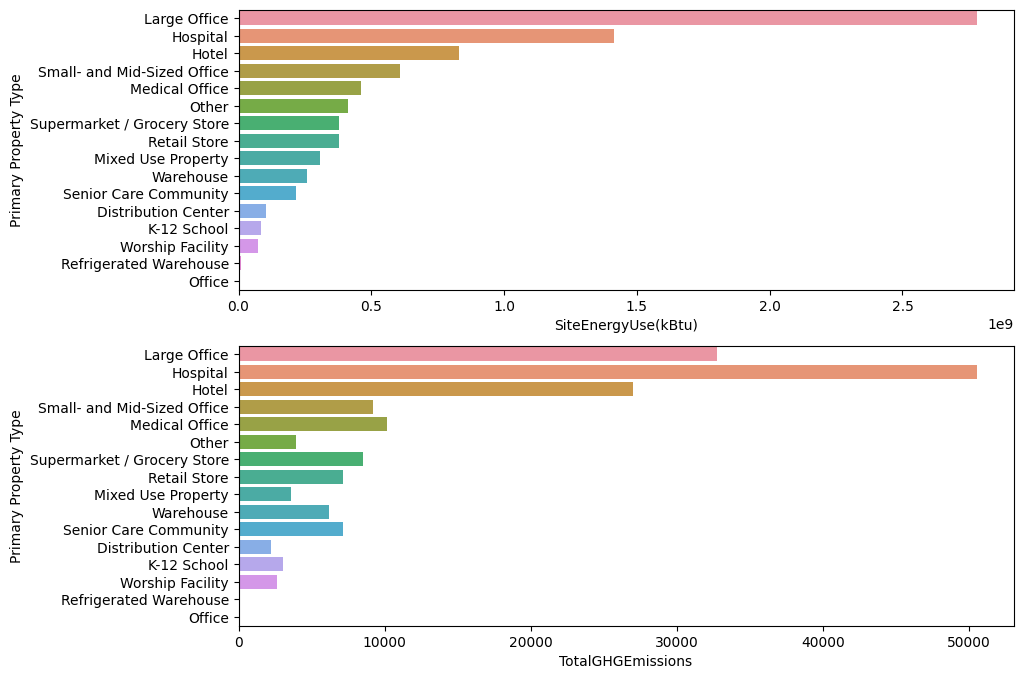

In [174]:
plt.figure(figsize=(10,8))
for i in range (len(cols_target)):
  plt.subplot(len(cols_target),1, i + 1)
  sns.barplot(data=df_final_groupby_sum, x=cols_target[i], y='PrimaryPropertyType')
  plt.xlabel(cols_target[i])
  plt.ylabel('Primary Property Type')
plt.show()

In the column **"PrimaryPropertyType"** there are many categories, here I cluster them into the following categories by their energy consumption:

* PPT_1: 'Large Office', 'Hospital'.

* PPT_2: 'Hotel', 'Small- and Mid-Sized Office'.

* PPT_3: 'Medical Office', 'Other', 'Supermarket / Grocery Store', 'Retail Store'.  

* PPT_4:  'Mixed Use Property', 'Warehouse', 'Senior Care Community', 'Distribution Center'.

* PPT_5: 'K-12 School', 'Worship Facility'.

* PPT_6: 'Refrigerated Warehouse', 'Office'.

In [175]:
REPLACEMENTS_PPT = [
    ('Large Office', "PPT_1"),
    ('Hospital', "PPT_1"),
    ('Hotel', "PPT_2"),
    ('Small- and Mid-Sized Office', "PPT_2"),
    ('Medical Office', "PPT_3"),
    ('Other', "PPT_3"),
    ('Supermarket / Grocery Store', "PPT_3"),
    ('Retail Store', "PPT_3"),
    ('Mixed Use Property', "PPT_4"),
    ('Warehouse', "PPT_4"),
    ('Senior Care Community', "PPT_4"),
    ('Distribution Center', "PPT_4"),
    ('K-12 School', "PPT_5"),
    ('Worship Facility', "PPT_5"),
    ('Refrigerated Warehouse', "PPT_6"),
    ('Office', "PPT_6")
]

In [176]:
for old, new in REPLACEMENTS_PPT:
    df_final['PrimaryPropertyType'] = df_final['PrimaryPropertyType'].replace(old, new)

df_final['PrimaryPropertyType'].unique()

array(['PPT_2', 'PPT_3', 'PPT_5', 'PPT_1', 'PPT_4', 'PPT_6'], dtype=object)

In [177]:
df_final.head(20)

,OSEBuildingID,PrimaryPropertyType,Neighborhood,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
0,1,PPT_2,CENTRAL,89,1.0,12,88434,88434,88434.0,60.0,7226362.5,249.98,15.793246,5.521381
1,2,PPT_2,CENTRAL,20,1.0,11,103566,88502,83880.0,61.0,8387933.0,295.86,15.942305,5.689886
2,3,PPT_2,CENTRAL,47,1.0,41,956110,759392,756493.0,43.0,72587024.0,2089.28,18.100297,7.644575
3,5,PPT_2,CENTRAL,90,1.0,10,61320,61320,61320.0,56.0,6794584.0,286.43,15.731636,5.657494
4,8,PPT_2,CENTRAL,36,1.0,18,175580,113580,123445.0,75.0,14172606.0,505.01,16.466822,6.224578
5,10,PPT_2,CENTRAL,90,1.0,11,83008,83008,81352.0,27.0,5758795.0,176.14,15.566239,5.171279
6,12,PPT_2,CENTRAL,112,1.0,15,163984,163984,163984.0,43.0,13723820.0,392.16,16.434644,5.971670
7,15,PPT_2,CENTRAL,47,1.0,11,153163,133884,133884.0,30.0,16016644.0,691.26,16.589139,6.538516
8,16,PPT_2,CENTRAL,18,1.0,25,333176,272015,336640.0,36.0,26941110.0,740.97,17.109164,6.607960
9,17,PPT_2,CENTRAL,88,1.0,9,65009,65009,65009.0,48.0,6596057.5,328.23,15.701983,5.793715


### One-Hot Encoding

In [178]:
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

In [179]:
le = LabelEncoder()
for col in cols_cat:
  df_final[col+'_le'] = le.fit_transform(df_final[col])

In [180]:
df_final.columns

Index(['OSEBuildingID', 'PrimaryPropertyType', 'Neighborhood', 'BuildingAge',
       'NumberofBuildings', 'NumberofFloors', 'PropertyGFATotal',
       'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       'ENERGYSTARScore', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
       'PrimaryPropertyType_le', 'Neighborhood_le'],
      dtype='object')

In [181]:
df_score= df_final['ENERGYSTARScore']

In [182]:
order =['OSEBuildingID',
        'PrimaryPropertyType', 'PrimaryPropertyType_le', 'Neighborhood', 'Neighborhood_le',
        'BuildingAge', 'NumberofBuildings', 'NumberofFloors',
        'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
        #'ENERGYSTARScore',
        'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log']
df_final= df_final[order]

In [183]:
df_final.sample(10)

,OSEBuildingID,PrimaryPropertyType,PrimaryPropertyType_le,Neighborhood,Neighborhood_le,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
396,809,PPT_2,1,CENTRAL,0,116,1.0,6,95760,79920,95760.0,5.392618e+06,74.45,15.500541,4.310128
46,115,PPT_2,1,CENTRAL,0,46,1.0,4,76213,50283,48546.0,3.476212e+06,48.76,15.061454,3.886910
367,761,PPT_3,2,CENTRAL,0,76,1.0,3,83118,83118,45000.0,2.443142e+06,27.82,14.708795,3.325755
58,194,PPT_3,2,NORTH,1,65,1.0,1,530039,530039,505103.0,2.771703e+07,723.47,17.137558,6.584059
12,23,PPT_2,1,CENTRAL,0,33,1.0,28,416281,331281,348329.0,3.355676e+07,802.89,17.328749,6.688218
133,381,PPT_3,2,NORTH,1,60,1.0,1,60880,60880,61666.0,1.429397e+07,384.27,16.475348,5.951345
96,334,PPT_1,0,CENTRAL,0,7,1.0,25,758043,529375,582725.0,2.701802e+07,229.25,17.112015,5.434813
620,21920,PPT_4,3,NORTH,1,36,1.0,2,33576,33576,33576.0,1.275232e+06,49.73,14.058638,3.906608
388,797,PPT_4,3,SOUTH,2,47,1.0,1,71718,71718,71718.0,1.517543e+05,1.06,11.930018,0.058269
163,416,PPT_2,1,CENTRAL,0,110,1.0,4,63540,63540,56747.0,3.518460e+06,74.83,15.073534,4.315219


In [184]:
encoder = OneHotEncoder()
df_enc=pd.DataFrame(encoder.fit_transform(df_final[cols_cat]).toarray())
df_enc.head(20)

,0,1,2,3,4,5,6,7,8
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [185]:
df_enc.columns = ['PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH']

In [186]:
df_final = df_final.join(df_enc)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              982 non-null    int64  
 1   PrimaryPropertyType        982 non-null    object 
 2   PrimaryPropertyType_le     982 non-null    int64  
 3   Neighborhood               982 non-null    object 
 4   Neighborhood_le            982 non-null    int64  
 5   BuildingAge                982 non-null    int64  
 6   NumberofBuildings          982 non-null    float64
 7   NumberofFloors             982 non-null    int64  
 8   PropertyGFATotal           982 non-null    int64  
 9   PropertyGFABuilding(s)     982 non-null    int64  
 10  LargestPropertyUseTypeGFA  982 non-null    float64
 11  SiteEnergyUse(kBtu)        982 non-null    float64
 12  TotalGHGEmissions          982 non-null    float64
 13  SiteEnergyUse(kBtu)_log    982 non-null    float64

In [187]:
df_final.head(20)

,OSEBuildingID,PrimaryPropertyType,PrimaryPropertyType_le,Neighborhood,Neighborhood_le,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1,PPT_2,1,CENTRAL,0,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,PPT_2,1,CENTRAL,0,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,PPT_2,1,CENTRAL,0,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,PPT_2,1,CENTRAL,0,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8,PPT_2,1,CENTRAL,0,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,10,PPT_2,1,CENTRAL,0,90,1.0,11,83008,83008,81352.0,5758795.0,176.14,15.566239,5.171279,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
6,12,PPT_2,1,CENTRAL,0,112,1.0,15,163984,163984,163984.0,13723820.0,392.16,16.434644,5.971670,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
7,15,PPT_2,1,CENTRAL,0,47,1.0,11,153163,133884,133884.0,16016644.0,691.26,16.589139,6.538516,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,16,PPT_2,1,CENTRAL,0,18,1.0,25,333176,272015,336640.0,26941110.0,740.97,17.109164,6.607960,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
9,17,PPT_2,1,CENTRAL,0,88,1.0,9,65009,65009,65009.0,6596057.5,328.23,15.701983,5.793715,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [188]:
cols_drop = ['PrimaryPropertyType', 'PrimaryPropertyType_le', 'Neighborhood', 'Neighborhood_le']
df_final.drop(columns=cols_drop,inplace=True)

In [189]:
df_final.head(5)

,OSEBuildingID,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,2,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,3,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,5,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,8,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [190]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 982 entries, 0 to 981
Data columns (total 20 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   OSEBuildingID              982 non-null    int64  
 1   BuildingAge                982 non-null    int64  
 2   NumberofBuildings          982 non-null    float64
 3   NumberofFloors             982 non-null    int64  
 4   PropertyGFATotal           982 non-null    int64  
 5   PropertyGFABuilding(s)     982 non-null    int64  
 6   LargestPropertyUseTypeGFA  982 non-null    float64
 7   SiteEnergyUse(kBtu)        982 non-null    float64
 8   TotalGHGEmissions          982 non-null    float64
 9   SiteEnergyUse(kBtu)_log    982 non-null    float64
 10  TotalGHGEmissions_log      982 non-null    float64
 11  PPT_1                      982 non-null    float64
 12  PPT_2                      982 non-null    float64
 13  PPT_3                      982 non-null    float64

## 3.2 Split Dataset

In [191]:
df_final.set_index(["OSEBuildingID"], inplace=True)
df_final.head(5)

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


In [192]:
df_final.columns

Index(['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 'PPT_1', 'PPT_2',
       'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH'],
      dtype='object')

In [193]:
features = ['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
       #'ENERGYSTARScore',
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6',
       'CENTRAL', 'NORTH', 'SOUTH']

In [194]:
X = df_final[features]
X

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [195]:
Y_GHG = df_final[target1]
Y_GHG

,TotalGHGEmissions_log
OSEBuildingID,
1,5.521381
2,5.689886
3,7.644575
5,5.657494
8,6.224578
...,...
50069,4.903792
50081,2.223542
50210,1.252763


In [196]:
Y_SE = df_final[target2]
Y_SE

,SiteEnergyUse(kBtu)_log
OSEBuildingID,
1,15.793246
2,15.942305
3,18.100297
5,15.731636
8,16.466822
...,...
50069,15.301797
50081,14.097657
50210,13.127685


In [197]:
from sklearn.model_selection import train_test_split

In [198]:
X_train, X_test, Y_SE_train, Y_SE_test = train_test_split(X, Y_SE, test_size = 0.2, random_state=42)
print(f'X_train is in shape of {X_train.shape}')
print(f'X_test is in shape of {X_test.shape}')

X_train is in shape of (785, 15)
X_test is in shape of (197, 15)


## 3.3 Standard Scale Numerical Features

In [199]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [200]:
X

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [201]:
cols_num = ['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
            'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA',
            #'ENERGYSTARScore',
            #'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log'
            ]

In [202]:
ss = StandardScaler()
X_train_ss = ss.fit_transform(X_train[cols_num])
X_test_ss = ss.fit_transform(X_test[cols_num])

Y_SE_train_ss = ss.fit_transform(np.array(Y_SE_train).reshape(-1, 1))
Y_SE_test_ss = ss.fit_transform(np.array(Y_SE_test).reshape(-1, 1))

# **4. Linear Regression**

## 4.1 Linear Regression

### GridSearchCV

In [203]:
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import GridSearchCV, KFold
import timeit

In [204]:
np.random.seed(5)
cv_train = KFold(n_splits = 5, shuffle = True, random_state = 45)
score = ('r2','neg_mean_absolute_error')
params = {'fit_intercept' : [True, False]}

In [205]:
lr_gridsearch = GridSearchCV(LinearRegression(),
                  param_grid=params,
                  scoring = score,            
                  verbose = 2,
                  cv = cv_train,
                  refit = 'neg_mean_absolute_error',
                  return_train_score = True,
                  n_jobs = -1
                 )

In [206]:
lr_gridsearch.fit(X_train,Y_SE_train)
lr_gridsearch.best_params_

Fitting 5 folds for each of 2 candidates, totalling 10 fits


{'fit_intercept': False}

In [211]:
lr_gridsearch.cv_results_

{'mean_fit_time': array([0.01058664, 0.00701728]),
 'std_fit_time': array([2.93637739e-03, 8.74559647e-05]),
 'mean_score_time': array([0.01069155, 0.00758743]),
 'std_score_time': array([0.00686192, 0.0015997 ]),
 'param_fit_intercept': masked_array(data=[True, False],
              mask=[False, False],
        fill_value='?',
             dtype=object),
 'params': [{'fit_intercept': True}, {'fit_intercept': False}],
 'split0_test_r2': array([0.52044408, 0.52044408]),
 'split1_test_r2': array([0.49746859, 0.49746859]),
 'split2_test_r2': array([0.52972058, 0.52972058]),
 'split3_test_r2': array([0.63577813, 0.63577813]),
 'split4_test_r2': array([0.54890841, 0.54890841]),
 'mean_test_r2': array([0.54646396, 0.54646396]),
 'std_test_r2': array([0.04762545, 0.04762545]),
 'rank_test_r2': array([2, 1], dtype=int32),
 'split0_train_r2': array([0.58112971, 0.58112971]),
 'split1_train_r2': array([0.58901947, 0.58901947]),
 'split2_train_r2': array([0.57987929, 0.57987929]),
 'split3_train_

In [207]:
lr_gridsearch.best_estimator_

LinearRegression(fit_intercept=False)

In [208]:
Y_SE_train_lr = lr_gridsearch.predict(X_train)

In [209]:
Y_SE_pred_lr = lr_gridsearch.predict(X_test)

In [50]:
fit_time_lr = lr_gridsearch.cv_results_['mean_fit_time'].mean()
pred_time_lr = lr_gridsearch.cv_results_['mean_score_time'].mean()
print('training time： {:.2f}s'.format(fit_time_lr))
print('predicting time: {:.2f}s'.format(pred_time_lr))

training time： 0.01s
predicting time: 0.01s


## 4.2 Ridge Regression

In [51]:
from sklearn import linear_model
from sklearn.linear_model import Ridge, RidgeCV
import timeit

### RidgeCV

In [52]:
n_alpha = 200 # The number of hyperparameters
alphas = np.logspace(-5, 5, n_alpha) # 10^(-5)~10^5

In [ ]:
ridge = RidgeCV(alphas,cv=10)
ridge.fit(X_train,Y_SE_train)

In [54]:
ridge.alpha_

0.8406652885618334

In [157]:
Y_SE_train_ridge = ridge.predict(X_train)

In [55]:
Y_SE_pred_ridge = ridge.predict(X_test)

## 4.3 Evaluation

In [56]:
from sklearn import metrics

### Linear Regression

In [210]:
mse_lr_train = metrics.mean_squared_error(Y_SE_train,Y_SE_train_lr)
r2_lr_train = metrics.r2_score(Y_SE_train,Y_SE_train_lr)
mae_lr_train = metrics.mean_absolute_error(Y_SE_train,Y_SE_train_lr)
print("RMSE_train=", mse_lr_train**(1/2), "R2_train=", r2_lr_train, "MAE_train=", mae_lr_train)

RMSE_train= 0.8510697006205901 R2_train= 0.574081909244023 MAE_train= 0.6605790765639897


In [57]:
mse_lr = metrics.mean_squared_error(Y_SE_test,Y_SE_pred_lr)
r2_lr = metrics.r2_score(Y_SE_test,Y_SE_pred_lr)
mae_lr = metrics.mean_absolute_error(Y_SE_test,Y_SE_pred_lr)
print("RMSE=", mse_lr**(1/2), "R2=", r2_lr, "MAE=", mae_lr)

RMSE= 0.9624204726356257 R2= 0.5146253452287382 MAE= 0.7406752324648789


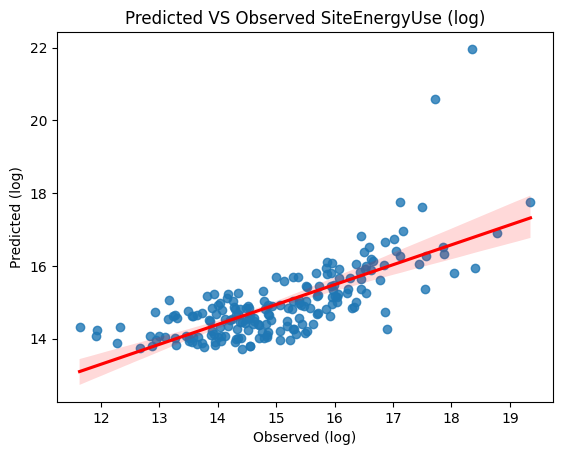

In [58]:
sns.regplot(x=Y_SE_test['SiteEnergyUse(kBtu)_log'], y=Y_SE_pred_lr[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

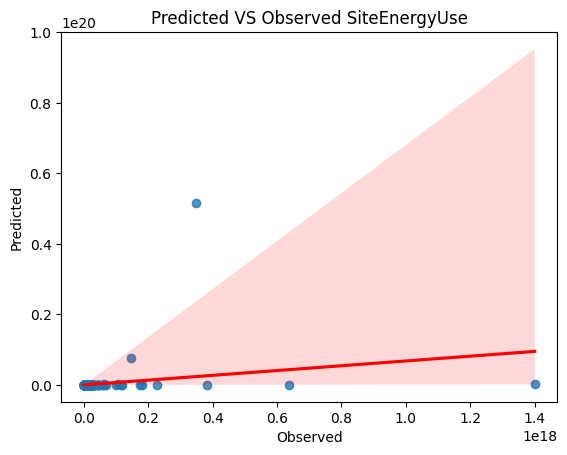

In [59]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test)), y=np.exp(ss.inverse_transform(Y_SE_pred_lr)), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

### Ridge Regression

In [158]:
mse_ridge_train = metrics.mean_squared_error(Y_SE_train,Y_SE_train_ridge)
r2_ridge_train = metrics.r2_score(Y_SE_train,Y_SE_train_ridge)
mae_ridge_train = metrics.mean_absolute_error(Y_SE_train,Y_SE_train_ridge)
print("RMSE_train=", mse_ridge_train**(1/2), "R2_train=", r2_ridge_train, "MAE_train=", mae_ridge_train)

RMSE_train= 0.8510892571111307 R2_train= 0.5740623349158404 MAE_train= 0.6605499578738615


In [62]:
mse_ridge = metrics.mean_squared_error(Y_SE_test,Y_SE_pred_ridge)
r2_ridge = metrics.r2_score(Y_SE_test,Y_SE_pred_ridge)
mae_ridge = metrics.mean_absolute_error(Y_SE_test,Y_SE_pred_ridge)
print("RMSE=", mse_ridge**(1/2), "R2=", r2_ridge, "MAE=", mae_ridge)

RMSE= 0.9631092678088748 R2= 0.5139303405710334 MAE= 0.7410969575231493


In [63]:
#Y_SE_pred_ridge.ndim

In [64]:
#Y_SE_pred_ridge[0,:]

In [65]:
#Y_SE_pred_ridge[:,0]

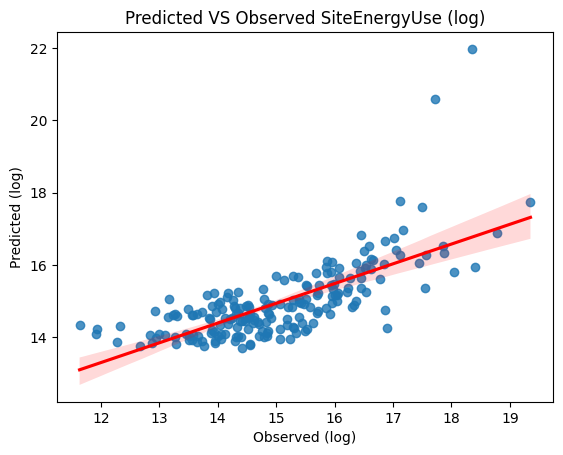

In [66]:
sns.regplot(x=Y_SE_test['SiteEnergyUse(kBtu)_log'], y=Y_SE_pred_ridge[:,0], line_kws={"color":"r"})
#plt.plot([Y_SE_test.min(), Y_SE_test.max()], [Y_SE_test.min(), Y_SE_test.max()])
plt.title("Predicted VS Observed SiteEnergyUse (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

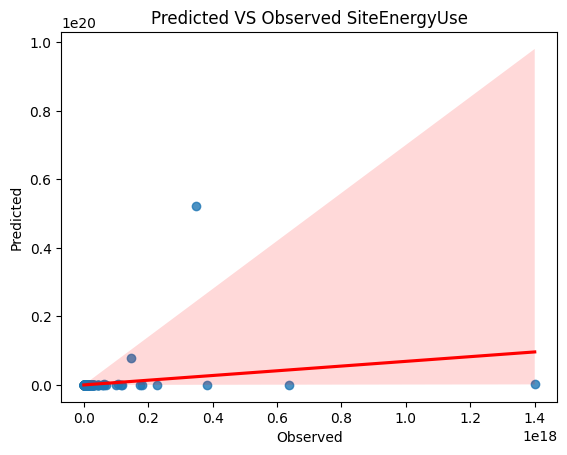

In [67]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test)), y=np.exp(ss.inverse_transform(Y_SE_pred_ridge)), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

# **5. Feature Engineering**

In [68]:
df_final

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,7.226362e+06,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,8.387933e+06,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,7.258702e+07,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,6.794584e+06,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,1.417261e+07,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,4.420650e+06,134.80,15.301797,4.903792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,1.325973e+06,9.24,14.097657,2.223542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,5.026677e+05,3.50,13.127685,1.252763,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [69]:
index_final=list(df_final.index)

In [70]:
df_nr=pd.read_csv('/content/drive/MyDrive/P4/df_nr.csv',sep=",")
df_nr.set_index(["OSEBuildingID"], inplace=True)
df_nr

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,89
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,20
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,47
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,90
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50222,2016,Nonresidential COS,Office,Horticulture building,1600 S Dakota St,Seattle,WA,NaN,1624049080,2,GREATER DUWAMISH,47.56722,-122.31154,1990,1.0,1,12294,0,12294,Office,Office,12294.0,NaN,NaN,NaN,NaN,NaN,46.0,69.099998,76.699997,161.699997,176.100006,8.497457e+05,9.430032e+05,0.00,1.536550e+05,5.242709e+05,3254.750244,3.254750e+05,True,NaN,Error - Correct Default Data,NaN,20.94,1.70,26
50223,2016,Nonresidential COS,Other,International district/Chinatown CC,719 8th Ave S,Seattle,WA,NaN,3558300000,2,DOWNTOWN,47.59625,-122.32283,2004,1.0,1,16000,0,16000,Other - Recreation,Other - Recreation,16000.0,NaN,NaN,NaN,NaN,NaN,NaN,59.400002,65.900002,114.199997,118.900002,9.502762e+05,1.053706e+06,0.00,1.162210e+05,3.965461e+05,5537.299805,5.537300e+05,False,NaN,Compliant,NaN,32.17,2.01,12
50224,2016,Nonresidential COS,Other,Queen Anne Pool,1920 1st Ave W,Seattle,WA,NaN,1794501150,7,MAGNOLIA / QUEEN ANNE,47.63644,-122.35784,1974,1.0,1,13157,0,13157,"Fitness Center/Health Club/Gym, Other - Recrea...",Other - Recreatio

In [71]:
df_fe = df_nr.loc[index_final]
df_fe

,DataYear,BuildingType,PrimaryPropertyType,PropertyName,Address,City,State,ZipCode,TaxParcelIdentificationNumber,CouncilDistrictCode,Neighborhood,Latitude,Longitude,YearBuilt,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFAParking,PropertyGFABuilding(s),ListOfAllPropertyUseTypes,LargestPropertyUseType,LargestPropertyUseTypeGFA,SecondLargestPropertyUseType,SecondLargestPropertyUseTypeGFA,ThirdLargestPropertyUseType,ThirdLargestPropertyUseTypeGFA,YearsENERGYSTARCertified,ENERGYSTARScore,SiteEUI(kBtu/sf),SiteEUIWN(kBtu/sf),SourceEUI(kBtu/sf),SourceEUIWN(kBtu/sf),SiteEnergyUse(kBtu),SiteEnergyUseWN(kBtu),SteamUse(kBtu),Electricity(kWh),Electricity(kBtu),NaturalGas(therms),NaturalGas(kBtu),DefaultData,Comments,ComplianceStatus,Outlier,TotalGHGEmissions,GHGEmissionsIntensity,BuildingAge
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,2016,NonResidential,Hotel,Mayflower park hotel,405 Olive way,Seattle,WA,98101.0,0659000030,7,DOWNTOWN,47.61220,-122.33799,1927,1.0,12,88434,0,88434,Hotel,Hotel,88434.0,NaN,NaN,NaN,NaN,NaN,60.0,81.699997,84.300003,182.500000,189.000000,7.226362e+06,7.456910e+06,2003882.00,1.156514e+06,3.946027e+06,12764.529300,1.276453e+06,False,NaN,Compliant,NaN,249.98,2.83,89
2,2016,NonResidential,Hotel,Paramount Hotel,724 Pine street,Seattle,WA,98101.0,0659000220,7,DOWNTOWN,47.61317,-122.33393,1996,1.0,11,103566,15064,88502,"Hotel, Parking, Restaurant",Hotel,83880.0,Parking,15064.0,Restaurant,4622.0,NaN,61.0,94.800003,97.900002,176.100006,179.399994,8.387933e+06,8.664479e+06,0.00,9.504252e+05,3.242851e+06,51450.816410,5.145082e+06,False,NaN,Compliant,NaN,295.86,2.86,20
3,2016,NonResidential,Hotel,5673-The Westin Seattle,1900 5th Avenue,Seattle,WA,98101.0,0659000475,7,DOWNTOWN,47.61393,-122.33810,1969,1.0,41,956110,196718,759392,Hotel,Hotel,756493.0,NaN,NaN,NaN,NaN,NaN,43.0,96.000000,97.699997,241.899994,244.100006,7.258702e+07,7.393711e+07,21566554.00,1.451544e+07,4.952666e+07,14938.000000,1.493800e+06,False,NaN,Compliant,NaN,2089.28,2.19,47
5,2016,NonResidential,Hotel,HOTEL MAX,620 STEWART ST,Seattle,WA,98101.0,0659000640,7,DOWNTOWN,47.61412,-122.33664,1926,1.0,10,61320,0,61320,Hotel,Hotel,61320.0,NaN,NaN,NaN,NaN,NaN,56.0,110.800003,113.300003,216.199997,224.000000,6.794584e+06,6.946800e+06,2214446.25,8.115253e+05,2.768924e+06,18112.130860,1.811213e+06,False,NaN,Compliant,NaN,286.43,4.67,90
8,2016,NonResidential,Hotel,WARWICK SEATTLE HOTEL (ID8),401 LENORA ST,Seattle,WA,98121.0,0659000970,7,DOWNTOWN,47.61375,-122.34047,1980,1.0,18,175580,62000,113580,"Hotel, Parking, Swimming Pool",Hotel,123445.0,Parking,68009.0,Swimming Pool,0.0,NaN,75.0,114.800003,118.699997,211.399994,215.600006,1.417261e+07,1.465650e+07,0.00,1.573449e+06,5.368607e+06,88039.984380,8.803998e+06,False,NaN,Compliant,NaN,505.01,2.88,36
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,2016,NonResidential,Small- and Mid-Sized Office,Airport - Main Terminal,7277 Perimeter Rd.,Seattle,WA,98108.0,2824049007,2,GREATER DUWAMISH,47.53161,-122.29944,1929,1.0,2,24990,0,24990,Office,Office,24990.0,NaN,NaN,NaN,NaN,NaN,9.0,176.899994,189.300003,367.000000,378.700012,4.420650e+06,4.731814e+06,0.00,6.351199e+05,2.167029e+06,22536.210940,2.253621e+06,False,NaN,Compliant,NaN,134.80,5.39,87
50081,2016,NonResidential,K-12 School,Hamlin Robinson School,1701 20th Ave South,Seattle,WA,98144.0,7548300840,3,GREATER DUWAMISH,47.58831,-122.30650,2015,1.0,3,45000,0,45000,"K-12 School, Parking",K-12 School,45728.0,Parking,0.0,NaN,NaN,NaN,77.0,29.000000,30.600000,91.099998,96.000000,1.325973e+06,1.397742e+06,0.00,3.886204e+05,1.325973e+06,0.000000,0.000000e+00,False,NaN,Compliant,NaN,9.24,0.21,1
50210,2016,Nonresidential COS,Office,Central West HQ / Brown Bear,1403 w howe,Seattle,WA,NaN,2425039137,7,MAGNOLIA / QUEEN ANNE,47.63572,-122.37525,1952,1.0,1,13661,0,13661,Office,Office,13661.0,NaN,NaN,NaN,NaN,NaN,75.0

In [72]:
df_fe['GFA1st_%']=(df_fe['LargestPropertyUseTypeGFA']/df_fe['PropertyGFATotal']*100).round()
df_fe['GFA2nd_%']=(df_fe['SecondLargestPropertyUseTypeGFA']/df_fe['PropertyGFATotal']*100).round()
df_fe['GFA3rd_%']=(df_fe['ThirdLargestPropertyUseTypeGFA']/df_fe['PropertyGFATotal']*100).round()

In [73]:
df_fe['Steam_%']=(df_fe['SteamUse(kBtu)']/df_fe['SiteEnergyUse(kBtu)']*100).round()
df_fe['Electricity_%']=(df_fe['Electricity(kBtu)']/df_fe['SiteEnergyUse(kBtu)']*100).round()
df_fe['Gas_%']=(df_fe['NaturalGas(kBtu)']/df_fe['SiteEnergyUse(kBtu)']*100).round()

In [74]:
df_fe=df_fe[['GFA1st_%','GFA2nd_%','GFA3rd_%','Steam_%','Electricity_%','Gas_%']]
df_fe.head(5)

,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%
OSEBuildingID,,,,,,
1,100.0,NaN,NaN,28.0,55.0,18.0
2,81.0,15.0,4.0,0.0,39.0,61.0
3,79.0,NaN,NaN,30.0,68.0,2.0
5,100.0,NaN,NaN,33.0,41.0,27.0
8,70.0,39.0,0.0,0.0,38.0,62.0


In [75]:
df_final=df_final.join(df_fe)
df_final.head(5)

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.0,NaN,NaN,28.0,55.0,18.0
2,20,1.0,11,103566,88502,83880.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,81.0,15.0,4.0,0.0,39.0,61.0
3,47,1.0,41,956110,759392,756493.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,79.0,NaN,NaN,30.0,68.0,2.0
5,90,1.0,10,61320,61320,61320.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,100.0,NaN,NaN,33.0,41.0,27.0
8,36,1.0,18,175580,113580,123445.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,70.0,39.0,0.0,0.0,38.0,62.0


In [76]:
df_final.columns

Index(['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'SiteEnergyUse(kBtu)', 'TotalGHGEmissions',
       'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 'PPT_1', 'PPT_2',
       'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH',
       'GFA1st_%', 'GFA2nd_%', 'GFA3rd_%', 'Steam_%', 'Electricity_%',
       'Gas_%'],
      dtype='object')

In [77]:
order_fe=['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)', 'LargestPropertyUseTypeGFA', 'GFA1st_%', 'GFA2nd_%', 'GFA3rd_%',
       'Steam_%', 'Electricity_%', 'Gas_%',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log', 
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH']
df_final= df_final[order_fe]
df_final.head(5)

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,100.0,NaN,NaN,28.0,55.0,18.0,7226362.5,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,79.0,NaN,NaN,30.0,68.0,2.0,72587024.0,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,100.0,NaN,NaN,33.0,41.0,27.0,6794584.0,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## GFA %

Considering only the surface area of the different property use types as a percentage of the total area

In [78]:
df_GFA=df_final.dropna(axis=0, how='any')
df_GFA

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8387933.0,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,14172606.0,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
57,43,1.0,5,168115,168115,103362.0,61.0,39.0,0.0,0.0,100.0,0.0,9536161.0,66.48,16.070602,4.196901,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
62,86,1.0,20,98634,88591,83591.0,85.0,10.0,5.0,0.0,89.0,11.0,4841347.5,59.19,15.392704,4.080753,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
63,34,1.0,34,994212,847518,994212.0,100.0,12.0,0.0,14.0,57.0,29.0,80469216.0,2451.58,18.203385,7.804488,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49737,98,1.0,3,43832,43832,24588.0,56.0,40.0,4.0,0.0,35.0,65.0,3886545.0,144.41,15.173031,4.972656,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
49776,28,1.0,13,354086,204760,193393.0,55.0,42.0,11.0,0.0,91.0,9.0,13458948.0,147.84,16.415155,4.996131,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
49802,3,1.0,4,62381,39433,60245.0,97.0,42.0,0.0,0.0,100.0,0.0,3497215.5,24.38,15.067478,3.193763,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [79]:
X_GFA = df_GFA[['GFA1st_%','GFA2nd_%','GFA3rd_%']]
Y_SE_GFA = df_GFA[target2]

In [80]:
X_train_gfa, X_test_gfa, Y_SE_train_gfa, Y_SE_test_gfa = train_test_split(X_GFA, Y_SE_GFA, test_size = 0.2, random_state=42)
print(f'X_train_gda is in shape of {X_train_gfa.shape}')
print(f'X_test_gfa is in shape of {X_test_gfa.shape}')

X_train_gda is in shape of (124, 3)
X_test_gfa is in shape of (32, 3)


In [81]:
X_train_ss_gfa = ss.fit_transform(X_train_gfa)
X_test_ss_gfa = ss.fit_transform(X_test_gfa)

Y_SE_train_ss_gfa = ss.fit_transform(np.array(Y_SE_train_gfa).reshape(-1, 1))
Y_SE_test_ss_gfa = ss.fit_transform(np.array(Y_SE_test_gfa).reshape(-1, 1))

In [82]:
lr_gridsearch.fit(X_train_gfa,Y_SE_train_gfa)
print(lr_gridsearch.best_params_)
print(lr_gridsearch.best_estimator_)

Fitting 5 folds for each of 2 candidates, totalling 10 fits
{'fit_intercept': True}
LinearRegression()


In [83]:
Y_SE_pred_lr_gfa = lr_gridsearch.predict(X_test_gfa)

In [84]:
mse_gfa = metrics.mean_squared_error(Y_SE_test_gfa,Y_SE_pred_lr_gfa)
r2_gfa = metrics.r2_score(Y_SE_test_gfa,Y_SE_pred_lr_gfa)
mae_gfa = metrics.mean_absolute_error(Y_SE_test_gfa,Y_SE_pred_lr_gfa)
print("RMSE=", mse_gfa**(1/2), "R2=", r2_gfa, "MAE=", mae_gfa)

RMSE= 1.1177577084443946 R2= 0.13839160679329077 MAE= 0.9309204222115589


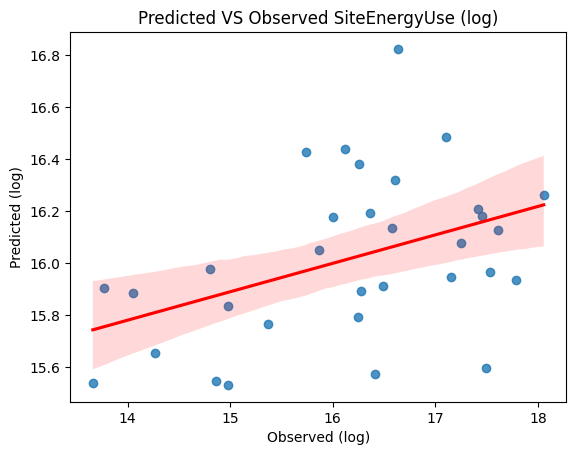

In [85]:
sns.regplot(x=Y_SE_test_gfa['SiteEnergyUse(kBtu)_log'], y=Y_SE_pred_lr_gfa[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

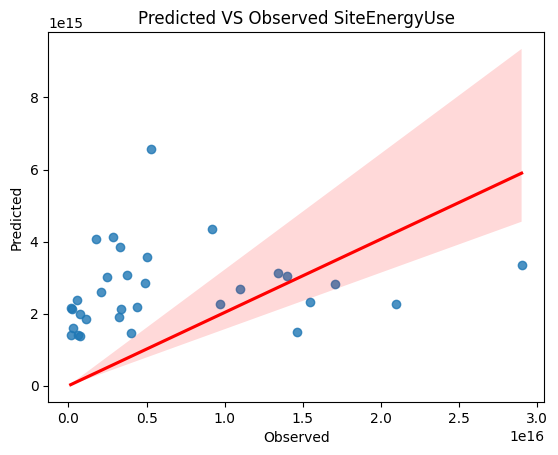

In [86]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test_gfa)), y=np.exp(ss.inverse_transform(Y_SE_pred_lr_gfa)), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

## Electricity/Steam/Gas %

Considering only electricity/stream/gas as a percentage of total energy use

In [87]:
df_ESG=df_final[['Steam_%','Electricity_%','Gas_%']]
df_ESG.dropna(axis=0, how='any', inplace=True)
df_ESG.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 1 to 50222
Data columns (total 3 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Steam_%        982 non-null    float64
 1   Electricity_%  982 non-null    float64
 2   Gas_%          982 non-null    float64
dtypes: float64(3)
memory usage: 63.0 KB


<ipython-input-87-62d6bf3e2d5e>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_ESG.dropna(axis=0, how='any', inplace=True)


In [88]:
X_ESG = df_ESG
Y_SE_ESG = df_final[target2]

In [89]:
X_train_esg, X_test_esg, Y_SE_train_esg, Y_SE_test_esg = train_test_split(X_ESG, Y_SE_ESG, test_size = 0.2, random_state=42)
print(f'X_train_esg is in shape of {X_train_esg.shape}')
print(f'X_test_esg is in shape of {X_test_esg.shape}')

X_train_esg is in shape of (785, 3)
X_test_esg is in shape of (197, 3)


In [90]:
X_train_ss_esg = ss.fit_transform(X_train_esg)
X_test_ss_esg = ss.fit_transform(X_test_esg)

Y_SE_train_ss_esg = ss.fit_transform(np.array(Y_SE_train_esg).reshape(-1, 1))
Y_SE_test_ss_esg = ss.fit_transform(np.array(Y_SE_test_esg).reshape(-1, 1))

In [91]:
lr_gridsearch.fit(X_train_esg,Y_SE_train_esg)
Y_SE_pred_lr_esg = lr_gridsearch.predict(X_test_esg)

Fitting 5 folds for each of 2 candidates, totalling 10 fits


In [92]:
mse_esg = metrics.mean_squared_error(Y_SE_test_esg,Y_SE_pred_lr_esg)
r2_esg = metrics.r2_score(Y_SE_test_esg,Y_SE_pred_lr_esg)
mae_esg = metrics.mean_absolute_error(Y_SE_test_esg,Y_SE_pred_lr_esg)
print("RMSE=", mse_esg**(1/2), "R2=", r2_esg, "MAE=", mae_esg)

RMSE= 1.3676011607301832 R2= 0.019909204385417878 MAE= 1.0826936002112566


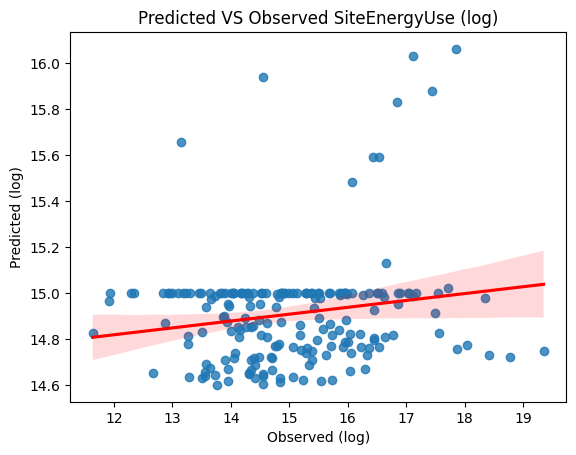

In [93]:
sns.regplot(x=Y_SE_test_esg['SiteEnergyUse(kBtu)_log'], y=Y_SE_pred_lr_esg[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

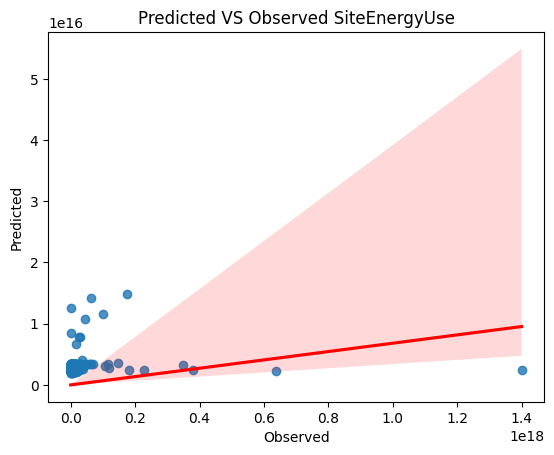

In [94]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test_esg)), y=np.exp(ss.inverse_transform(Y_SE_pred_lr_esg)), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

## Building info: BuildingAge, NumberofBuildings,	NumberofFloors,	PropertyGFATotal

Considering only these 4 variables

In [95]:
df_4f=df_final[['BuildingAge','NumberofBuildings','NumberofFloors','PropertyGFATotal']]

In [96]:
X_4f = df_4f
Y_SE_4f = df_final[target2]

X_train_4f, X_test_4f, Y_SE_train_4f, Y_SE_test_4f = train_test_split(X_4f, Y_SE_4f, test_size = 0.2, random_state=42)
print(f'X_train_4f is in shape of {X_train_4f.shape}')
print(f'X_test_4f is in shape of {X_test_4f.shape}')

X_train_ss_4f = ss.fit_transform(X_train_4f)
X_test_ss_4f = ss.fit_transform(X_test_4f)

Y_SE_train_ss_4f = ss.fit_transform(np.array(Y_SE_train_4f).reshape(-1, 1))
Y_SE_test_ss_4f = ss.fit_transform(np.array(Y_SE_test_4f).reshape(-1, 1))

lr_gridsearch.fit(X_train_4f,Y_SE_train_4f)
Y_SE_pred_lr_4f = lr_gridsearch.predict(X_test_4f)

mse_4f = metrics.mean_squared_error(Y_SE_test_4f,Y_SE_pred_lr_4f)
r2_4f = metrics.r2_score(Y_SE_test_4f,Y_SE_pred_lr_4f)
mae_4f = metrics.mean_absolute_error(Y_SE_test_4f,Y_SE_pred_lr_4f)
print("RMSE=", mse_4f**(1/2), "R2=", r2_4f, "MAE=", mae_4f)

X_train_4f is in shape of (785, 4)
X_test_4f is in shape of (197, 4)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
RMSE= 1.0836628043675984 R2= 0.38463084607473774 MAE= 0.8432600869276075


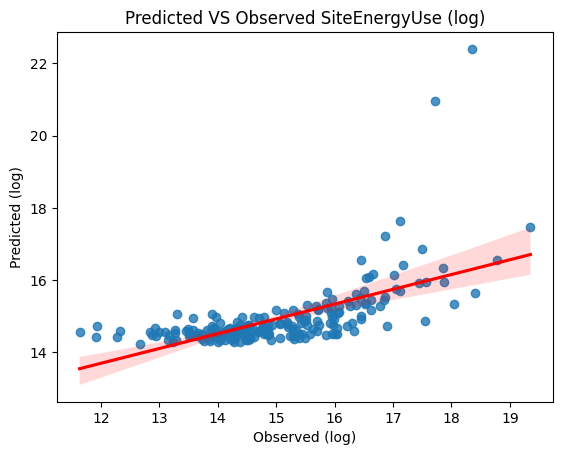

In [97]:
sns.regplot(x=Y_SE_test_4f['SiteEnergyUse(kBtu)_log'], y=Y_SE_pred_lr_4f[:,0], line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

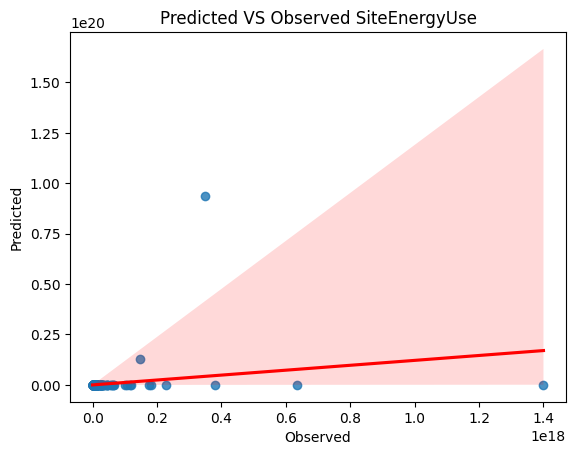

In [98]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test_4f)), y=np.exp(ss.inverse_transform(Y_SE_pred_lr_4f)), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

## Building single info: one of these 4 variables: BuildingAge, NumberofBuildings, NumberofFloors, PropertyGFATotal

In [99]:
#df_1f=df_final[['BuildingAge']]
#df_1f=df_final[['NumberofBuildings']]
#df_1f=df_final[['NumberofFloors']]
df_1f=df_final[['PropertyGFATotal']]

In [100]:
X_1f = df_1f
Y_SE_1f = df_final[target2]

X_train_1f, X_test_1f, Y_SE_train_1f, Y_SE_test_1f = train_test_split(X_1f, Y_SE_1f, test_size = 0.2, random_state=42)
print(f'X_train_1f is in shape of {X_train_1f.shape}')
print(f'X_test_1f is in shape of {X_test_1f.shape}')

X_train_ss_1f = ss.fit_transform(X_train_1f)
X_test_ss_1f = ss.fit_transform(X_test_1f)
Y_SE_train_ss_1f = ss.fit_transform(np.array(Y_SE_train_1f).reshape(-1, 1))
Y_SE_test_ss_1f = ss.fit_transform(np.array(Y_SE_test_1f).reshape(-1, 1))

lr_gridsearch.fit(X_train_1f,Y_SE_train_1f)
Y_SE_pred_lr_1f = lr_gridsearch.predict(X_test_1f)

mse_1f = metrics.mean_squared_error(Y_SE_test_1f,Y_SE_pred_lr_1f)
r2_1f = metrics.r2_score(Y_SE_test_1f,Y_SE_pred_lr_1f)
mae_1f = metrics.mean_absolute_error(Y_SE_test_1f,Y_SE_pred_lr_1f)
print("RMSE=", mse_1f**(1/2), "R2=", r2_1f, "MAE=", mae_1f)

X_train_1f is in shape of (785, 1)
X_test_1f is in shape of (197, 1)
Fitting 5 folds for each of 2 candidates, totalling 10 fits
RMSE= 1.0861300099073536 R2= 0.3818255998454798 MAE= 0.8528158257745695


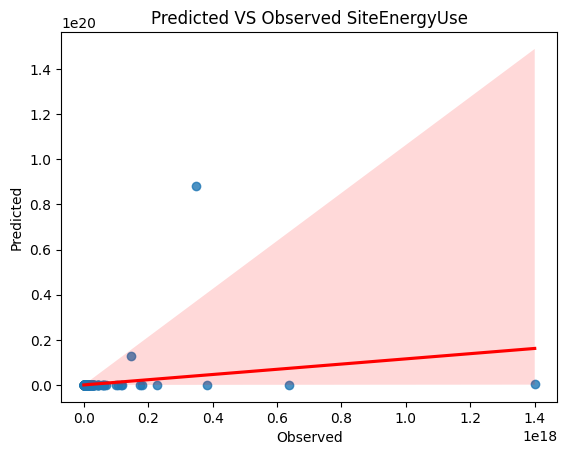

In [101]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test_1f)), y=np.exp(ss.inverse_transform(Y_SE_pred_lr_1f)), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

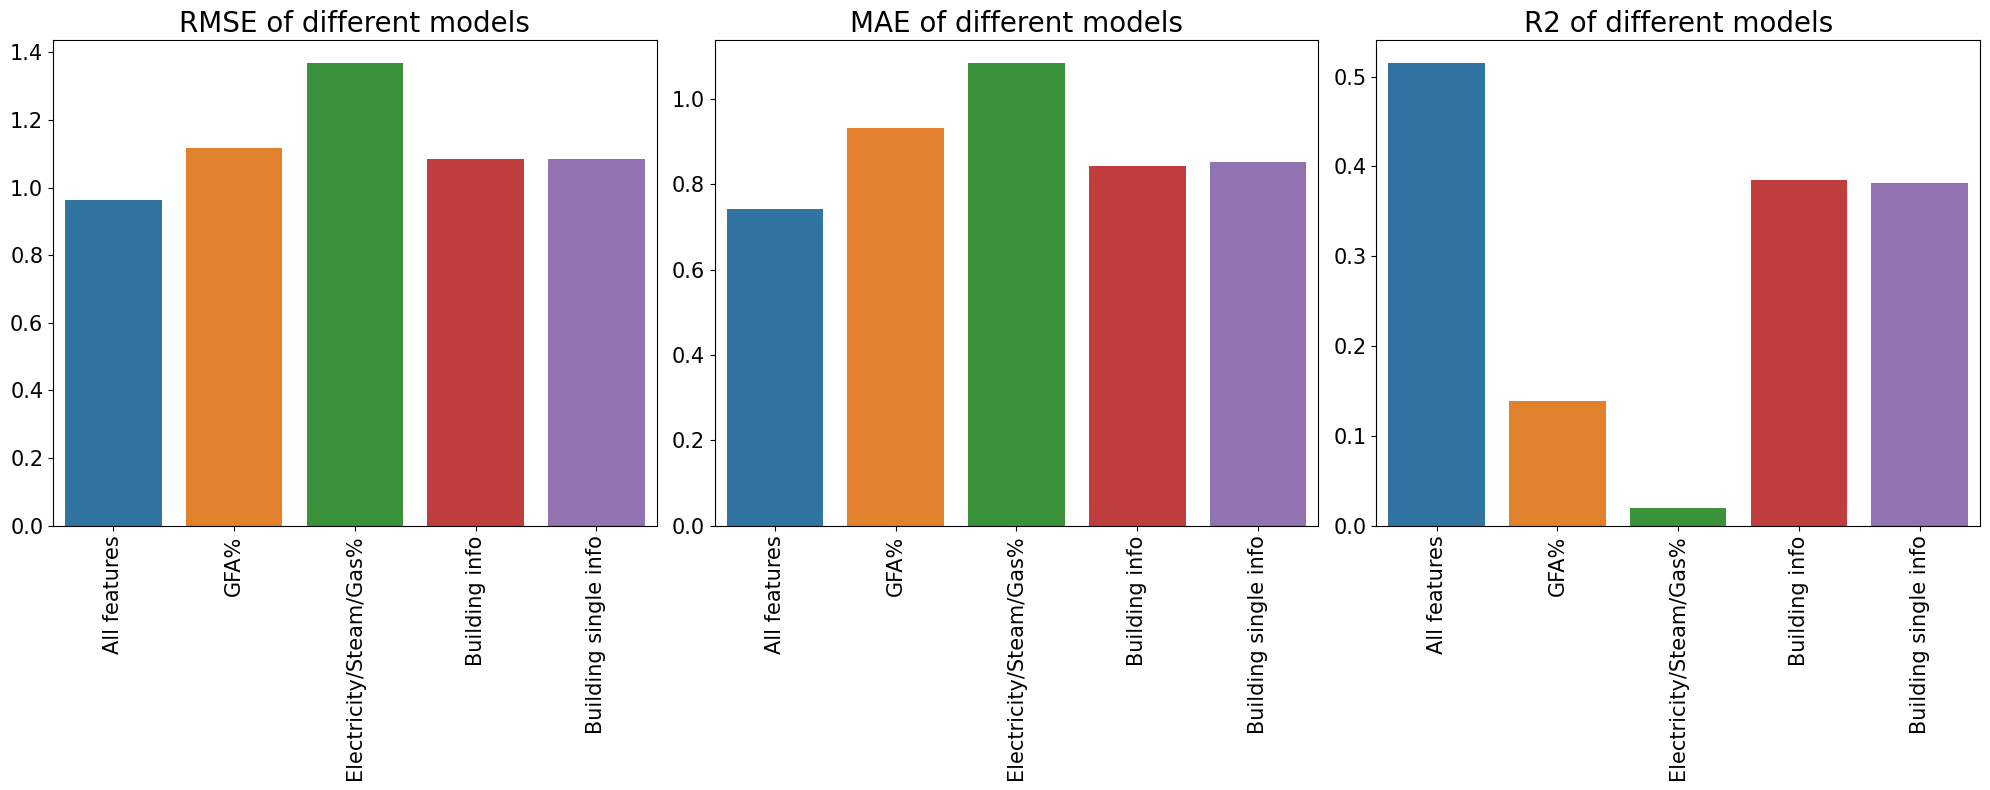

In [102]:
fig = plt.figure(figsize = (20, 8))
listeModeles = ['All features', 'GFA%', 'Electricity/Steam/Gas%', 'Building info', 'Building single info']

listeMSE = [mse_lr, mse_gfa, mse_esg, mse_4f, mse_1f]
listeRMSE = [i**(1/2) for i in listeMSE]

listeMAE = [mae_lr, mae_gfa, mae_esg, mae_4f, mae_1f]

listeR2 = [r2_lr, r2_gfa, r2_esg, r2_4f, r2_1f]

plt.subplot(1,3,1)
sns.barplot(x = listeModeles, y = listeRMSE)
plt.title('RMSE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
sns.barplot(x = listeModeles, y = listeMAE)
plt.title('MAE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
sns.barplot(x = listeModeles, y = listeR2)
plt.title('R2 of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

Clearly, the linear model with all the features produces the best result.

# **6. Nonlinear Modelling: Random Forest**

In [103]:
from sklearn.tree import DecisionTreeRegressor  
from sklearn.ensemble import RandomForestRegressor 

In [104]:
np.random.seed(5)
cv_train = KFold(n_splits = 5, shuffle = True, random_state = 45)

In [105]:
#param_rf = { 
#    'n_estimators': [100, 200, 300, 500, 800, 1000, 1200],
#    'max_features': ['auto', 'sqrt', 'log2'],
#    'max_depth' : [5, 10, 15, 20, 25, 30, 35, None],
#    'bootstrap' : [True, False]}

In [106]:
#rf = GridSearchCV(RandomForestRegressor(),
#                   param_grid = param_rf,
#                   verbose = 2,
#                   cv = cv_train,
#                   scoring = score,
#                   refit = 'neg_mean_absolute_error',
#                   return_train_score = True,
#                   n_jobs = -1)

In [107]:
#rf.fit(X_train,Y_SE_train)

In [108]:
#rf.best_params_

In [109]:
param_rf = {'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['sqrt'],
 'n_estimators': [1200]}

In [110]:
#rf = GridSearchCV(RandomForestRegressor(),
#                   param_grid = param_rf,
#                   verbose = 2,
#                   cv = cv_train,
#                   scoring = score,
#                   refit = 'neg_mean_absolute_error',
#                   return_train_score = True,
#                   n_jobs = -1)

In [111]:
rf = RandomForestRegressor(n_estimators=1200,
               criterion = 'absolute_error',
               max_depth=10,
               max_features='sqrt',
               bootstrap=True,
               n_jobs = -1,
               verbose = 2)

In [112]:
rf.fit(X_train,Y_SE_train)

<ipython-input-112-af2fcd5dc0e2>:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf.fit(X_train,Y_SE_train)
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1200
building tree 2 of 1200
building tree 3 of 1200building tree 4 of 1200

building tree 5 of 1200building tree 6 of 1200

building tree 7 of 1200building tree 8 of 1200

building tree 9 of 1200building tree 10 of 1200

building tree 11 of 1200
building tree 12 of 1200
building tree 13 of 1200
building tree 14 of 1200building tree 15 of 1200

building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200building tree 23 of 1200

building tree 24 of 1200building tree 25 of 1200

building tree 26 of 1200
building tree 27 of 1200
building tree 28 of 1200building tree 29 of 1200

building tree 30 of 1200building tree 31 of 1200

building tree 32 of 1200building tree 33 of 1200

building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200building tree 37 of 1200

building tree 38 of 1200building tree 39 of 1200

building tree 40 of 1200
building 

[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.4s


building tree 58 of 1200
building tree 59 of 1200
building tree 60 of 1200
building tree 61 of 1200
building tree 62 of 1200
building tree 63 of 1200
building tree 64 of 1200
building tree 65 of 1200
building tree 66 of 1200
building tree 67 of 1200
building tree 68 of 1200
building tree 69 of 1200
building tree 70 of 1200
building tree 71 of 1200
building tree 72 of 1200
building tree 73 of 1200
building tree 74 of 1200
building tree 75 of 1200
building tree 76 of 1200
building tree 77 of 1200
building tree 78 of 1200
building tree 79 of 1200
building tree 80 of 1200
building tree 81 of 1200
building tree 82 of 1200
building tree 83 of 1200
building tree 84 of 1200
building tree 85 of 1200
building tree 86 of 1200
building tree 87 of 1200
building tree 88 of 1200
building tree 89 of 1200
building tree 90 of 1200
building tree 91 of 1200building tree 92 of 1200

building tree 93 of 1200
building tree 94 of 1200
building tree 95 of 1200
building tree 96 of 1200
building tree 97 of 1200


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    1.4s


building tree 174 of 1200
building tree 175 of 1200
building tree 176 of 1200
building tree 177 of 1200
building tree 178 of 1200
building tree 179 of 1200
building tree 180 of 1200
building tree 181 of 1200
building tree 182 of 1200
building tree 183 of 1200
building tree 184 of 1200building tree 185 of 1200

building tree 186 of 1200
building tree 187 of 1200
building tree 188 of 1200
building tree 189 of 1200
building tree 190 of 1200
building tree 191 of 1200
building tree 192 of 1200
building tree 193 of 1200
building tree 194 of 1200
building tree 195 of 1200
building tree 196 of 1200
building tree 197 of 1200
building tree 198 of 1200
building tree 199 of 1200
building tree 200 of 1200
building tree 201 of 1200
building tree 202 of 1200
building tree 203 of 1200
building tree 204 of 1200
building tree 205 of 1200
building tree 206 of 1200
building tree 207 of 1200
building tree 208 of 1200
building tree 209 of 1200
building tree 210 of 1200
building tree 211 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    2.9s


building tree 365 of 1200
building tree 366 of 1200
building tree 367 of 1200
building tree 368 of 1200
building tree 369 of 1200
building tree 370 of 1200
building tree 371 of 1200
building tree 372 of 1200
building tree 373 of 1200
building tree 374 of 1200
building tree 375 of 1200
building tree 376 of 1200
building tree 377 of 1200
building tree 378 of 1200
building tree 379 of 1200
building tree 380 of 1200
building tree 381 of 1200
building tree 382 of 1200
building tree 383 of 1200
building tree 384 of 1200
building tree 385 of 1200
building tree 386 of 1200
building tree 387 of 1200
building tree 388 of 1200building tree 389 of 1200

building tree 390 of 1200
building tree 391 of 1200
building tree 392 of 1200
building tree 393 of 1200
building tree 394 of 1200
building tree 395 of 1200
building tree 396 of 1200
building tree 397 of 1200
building tree 398 of 1200
building tree 399 of 1200
building tree 400 of 1200
building tree 401 of 1200
building tree 402 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:    5.1s


building tree 669 of 1200
building tree 670 of 1200
building tree 671 of 1200
building tree 672 of 1200
building tree 673 of 1200
building tree 674 of 1200
building tree 675 of 1200
building tree 676 of 1200
building tree 677 of 1200
building tree 678 of 1200
building tree 679 of 1200
building tree 680 of 1200
building tree 681 of 1200
building tree 682 of 1200
building tree 683 of 1200
building tree 684 of 1200
building tree 685 of 1200
building tree 686 of 1200
building tree 687 of 1200
building tree 688 of 1200
building tree 689 of 1200
building tree 690 of 1200building tree 691 of 1200

building tree 692 of 1200
building tree 693 of 1200
building tree 694 of 1200
building tree 695 of 1200
building tree 696 of 1200
building tree 697 of 1200
building tree 698 of 1200
building tree 699 of 1200building tree 700 of 1200

building tree 701 of 1200
building tree 702 of 1200
building tree 703 of 1200
building tree 704 of 1200
building tree 705 of 1200
building tree 706 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:    7.8s


building tree 1032 of 1200
building tree 1033 of 1200
building tree 1034 of 1200
building tree 1035 of 1200
building tree 1036 of 1200
building tree 1037 of 1200
building tree 1038 of 1200
building tree 1039 of 1200building tree 1040 of 1200
building tree 1041 of 1200

building tree 1042 of 1200building tree 1043 of 1200

building tree 1044 of 1200
building tree 1045 of 1200
building tree 1046 of 1200
building tree 1047 of 1200
building tree 1048 of 1200
building tree 1049 of 1200
building tree 1050 of 1200
building tree 1051 of 1200
building tree 1052 of 1200
building tree 1053 of 1200
building tree 1054 of 1200
building tree 1055 of 1200
building tree 1056 of 1200
building tree 1057 of 1200
building tree 1058 of 1200
building tree 1059 of 1200
building tree 1060 of 1200
building tree 1061 of 1200
building tree 1062 of 1200
building tree 1063 of 1200
building tree 1064 of 1200
building tree 1065 of 1200
building tree 1066 of 1200
building tree 1067 of 1200
building tree 1068 of 1200
b

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:    9.3s finished


RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', n_estimators=1200, n_jobs=-1,
                      verbose=2)

In [223]:
Y_SE_train_rf = rf.predict(X_train)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:    0.4s finished


In [218]:
Y_SE_pred_rf = rf.predict(X_test)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.0s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:    0.4s finished


In [224]:
mse_rf_train = metrics.mean_squared_error(Y_SE_train,Y_SE_train_rf)
r2_rf_train = metrics.r2_score(Y_SE_train,Y_SE_train_rf)
mae_rf_train = metrics.mean_absolute_error(Y_SE_train,Y_SE_train_rf)
print("RMSE_train=", mse_rf_train**(1/2), "R2_train=", r2_rf_train, "MAE_train=", mae_rf_train)

RMSE_train= 0.4207377524797752 R2_train= 0.8959076546613376 MAE_train= 0.29546114661476675


In [216]:
mse_rf = metrics.mean_squared_error(Y_SE_test,Y_SE_pred_rf)
r2_rf = metrics.r2_score(Y_SE_test,Y_SE_pred_rf)
mae_rf = metrics.mean_absolute_error(Y_SE_test,Y_SE_pred_rf)
print("RMSE=", mse_rf**(1/2), "R2=", r2_rf, "MAE=", mae_rf)

RMSE= 0.7778767314109647 R2= 0.6829199263082301 MAE= 0.5519201359212355


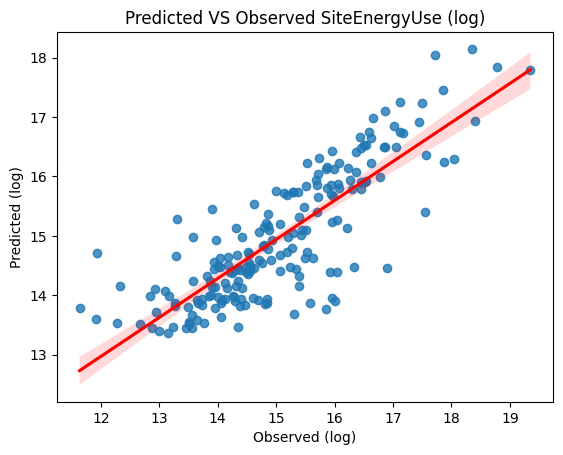

In [115]:
sns.regplot(x=Y_SE_test['SiteEnergyUse(kBtu)_log'], y=Y_SE_pred_rf, line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse (log)")
plt.xlabel("Observed (log)")
plt.ylabel("Predicted (log)")
plt.show()

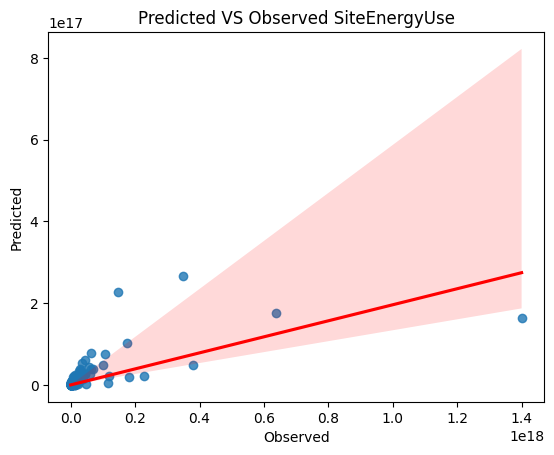

In [116]:
sns.regplot(x=np.exp(ss.inverse_transform(Y_SE_test)), y=np.exp(ss.inverse_transform(Y_SE_pred_rf.reshape(-1, 1))), line_kws={"color":"r"})
plt.title("Predicted VS Observed SiteEnergyUse")
plt.xlabel("Observed")
plt.ylabel("Predicted")
plt.show()

# **7. Models Comparison**

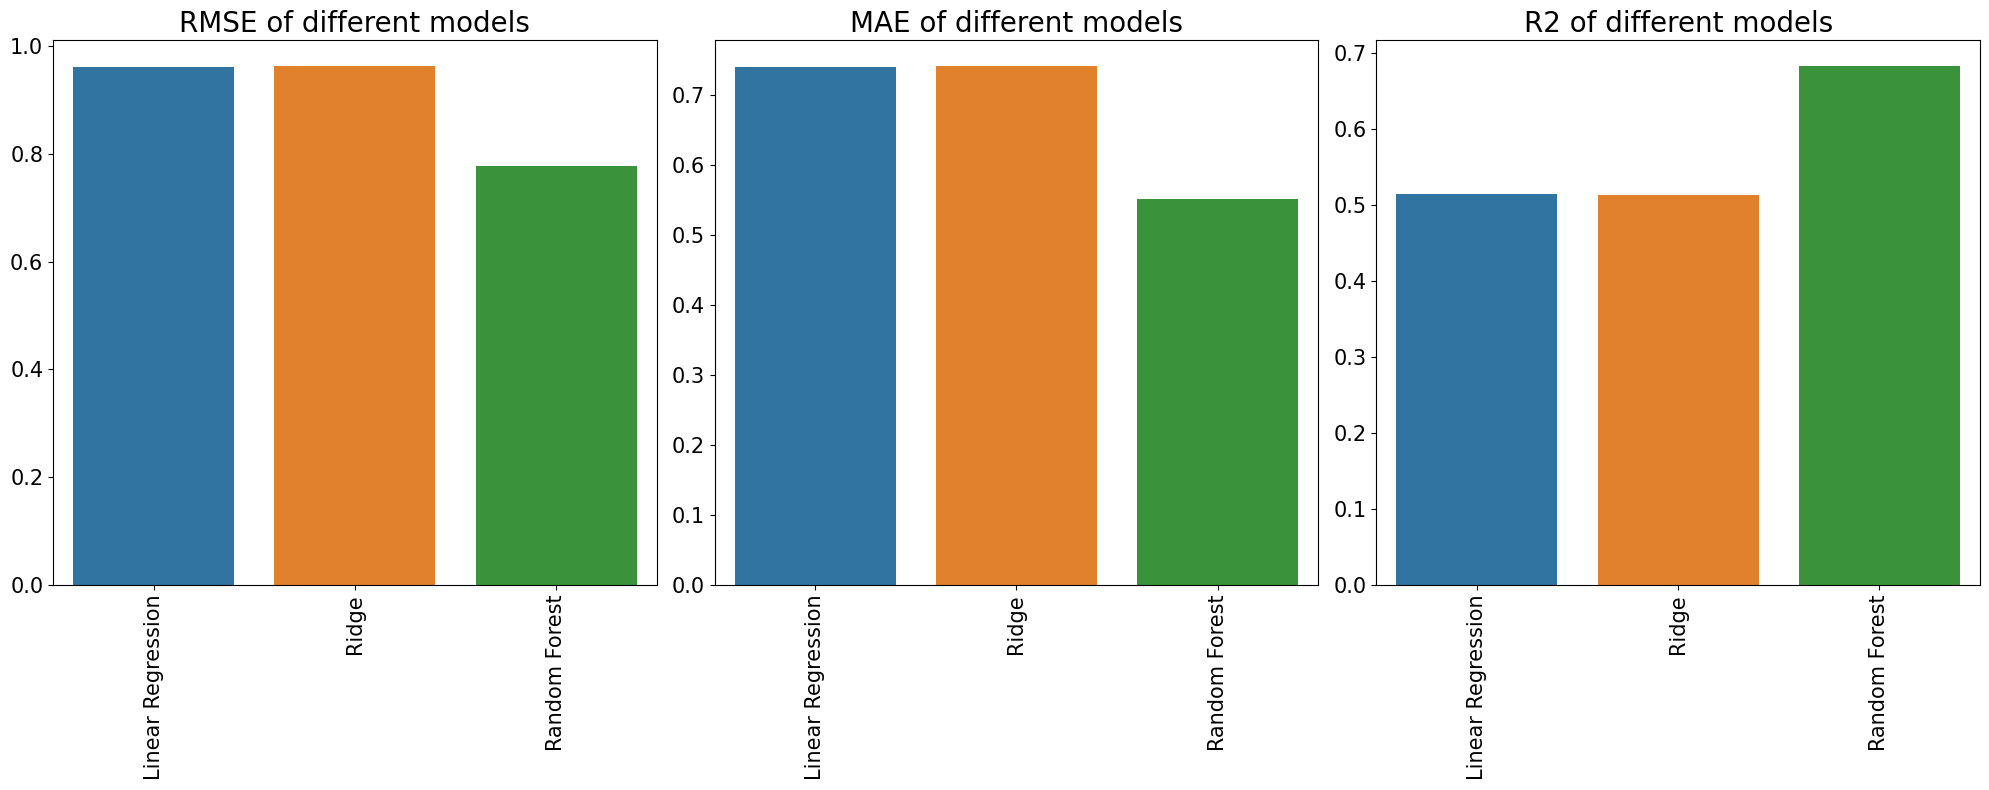

In [117]:
fig = plt.figure(figsize = (20, 8))
listeModeles = ['Linear Regression', 'Ridge', 'Random Forest']

listeMSE = [mse_lr, mse_ridge, mse_rf]
listeRMSE = [I**(1/2) for I in listeMSE]

listeMAE = [mae_lr, mae_ridge, mae_rf]

listeR2 = [r2_lr, r2_ridge, r2_rf]

plt.subplot(1,3,1)
sns.barplot(x = listeModeles, y = listeRMSE)
plt.title('RMSE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
sns.barplot(x = listeModeles, y = listeMAE)
plt.title('MAE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
sns.barplot(x = listeModeles, y = listeR2)
plt.title('R2 of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

Random Forest produces better results.

# **8. Feature Importance**

In [118]:
pip install shap

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 572.6/572.6 kB 9.4 MB/s eta 0:00:00


In [119]:
import shap
from shap import TreeExplainer, Explanation
from shap.plots import waterfall

In [120]:
shap.initjs()

In [121]:
explainer = shap.TreeExplainer(rf,feature_perturbation="correlation_dependent")

In [122]:
shap_values = explainer.shap_values(X_test)
shap_values

array([[-7.22014099e-02, -3.80536957e-03, -1.14305842e-01, ...,
        -2.08815863e-02, -2.89402757e-03, -4.32082973e-02],
       [-5.67020515e-03, -3.93472997e-03, -7.75394756e-02, ...,
        -2.63848100e-02, -1.50853735e-02, -7.95169708e-02],
       [ 3.55235475e-02, -3.34438336e-03, -9.17015771e-02, ...,
        -5.69862589e-03,  5.16755956e-02,  3.82655844e-02],
       ...,
       [-1.26584907e-02, -2.93316488e-03, -6.08148518e-02, ...,
         1.94362736e-02,  8.72828231e-03,  7.15001700e-03],
       [-6.28535942e-02, -3.90665205e-03, -1.15735388e-01, ...,
        -1.82412450e-02, -1.18764862e-02, -5.43796662e-02],
       [ 3.32229527e-02, -6.78216669e-03,  1.02002831e-01, ...,
         3.32025209e-02,  4.18614222e-05,  2.57180553e-02]])

In [123]:
rf.feature_importances_

array([0.0834893 , 0.00766507, 0.09732936, 0.24151128, 0.21871899,
       0.2104996 , 0.03819588, 0.01158121, 0.01873664, 0.02349761,
       0.0114621 , 0.00136079, 0.01260186, 0.0089094 , 0.01444093])

## Global Variable

No data for colormapping provided via 'c'. Parameters 'vmin', 'vmax' will be ignored


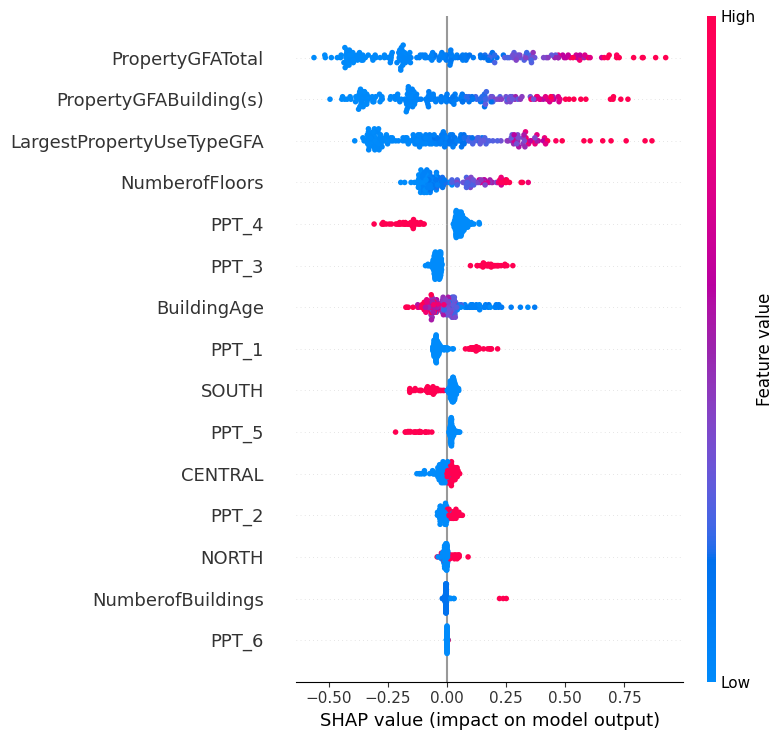

In [124]:
shap.summary_plot(shap_values, X_test)

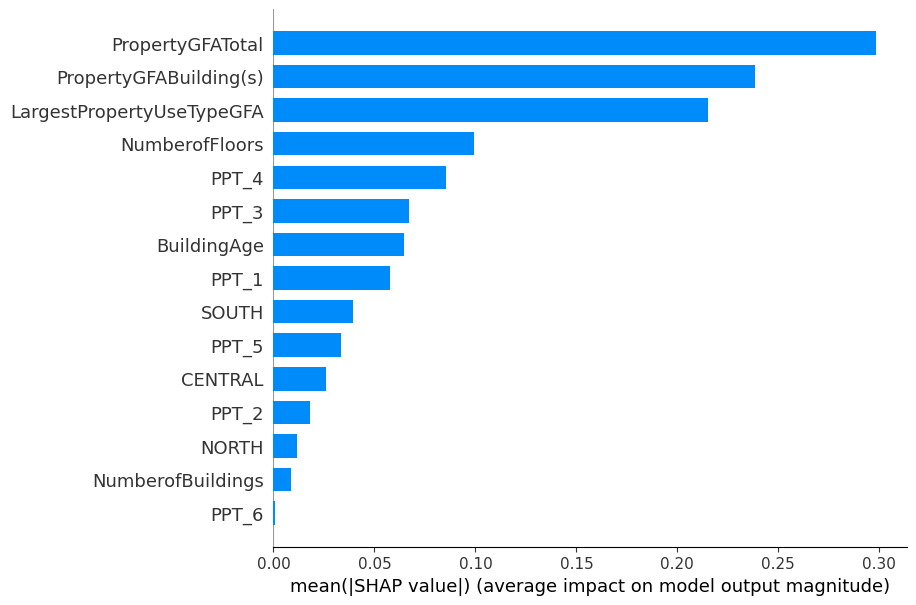

In [125]:
fig = plt.figure()
shap.summary_plot(shap_values,
                  feature_names=X_test.columns,
                  plot_type="bar",
                  show=False
                  )
plt.gcf().set_size_inches(10,6)
plt.show()

## Local Variable

###Bar Plot

In [126]:
Y_SE_test.describe()

,SiteEnergyUse(kBtu)_log
count,197.000000
mean,15.049458
std,1.384941
min,11.636293
25%,14.054408
50%,14.860307
75%,15.963845
max,19.352185


In [127]:
Y_SE_test[Y_SE_test['SiteEnergyUse(kBtu)_log']>19]

,SiteEnergyUse(kBtu)_log
OSEBuildingID,
198,19.352185


In [128]:
X_test.loc[198]

BuildingAge                      63.0
NumberofBuildings                 6.0
NumberofFloors                   10.0
PropertyGFATotal             879000.0
PropertyGFABuilding(s)       879000.0
LargestPropertyUseTypeGFA    879000.0
PPT_1                             1.0
PPT_2                             0.0
PPT_3                             0.0
PPT_4                             0.0
PPT_5                             0.0
PPT_6                             0.0
CENTRAL                           0.0
NORTH                             1.0
SOUTH                             0.0
Name: 198, dtype: float64

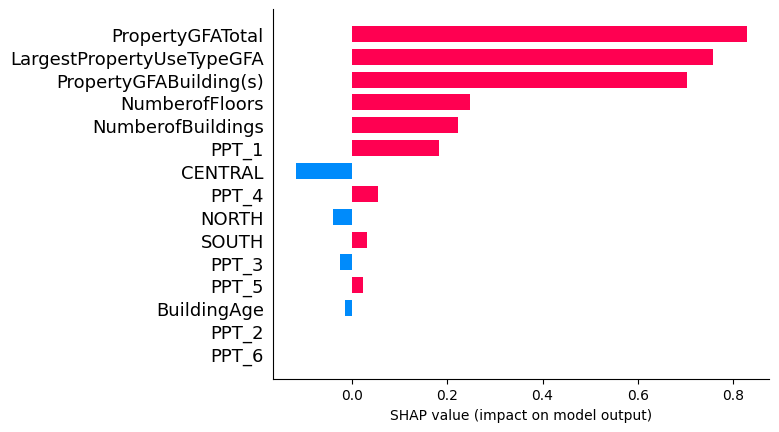

In [129]:
shap.bar_plot(explainer.shap_values(X_test.loc[198]),
              feature_names=X_test.columns,
              max_display=len(X_test.columns)
              )

### Waterfall Plot

In [130]:
explainer_wf = shap.Explainer(rf, X_test)
sv = explainer_wf(X_test)

 99%|===================| 196/197 [01:43<00:00]       

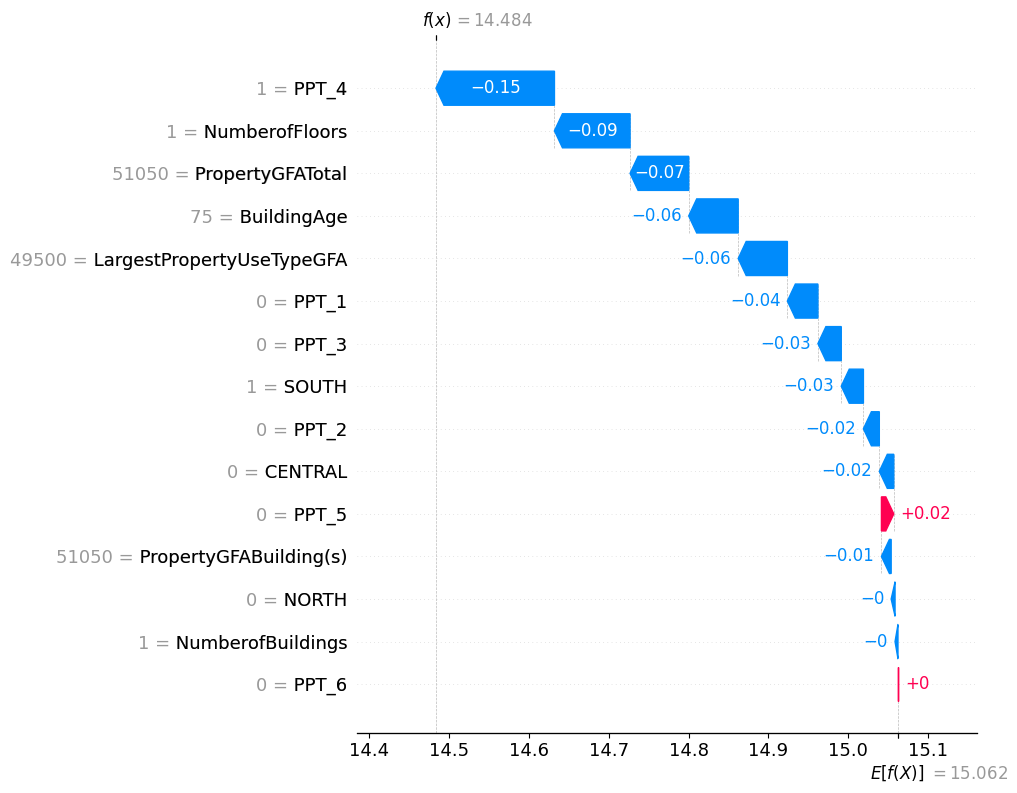

In [131]:
shap.plots.waterfall(sv[0],max_display=len(X_test.columns))

# **9. Impact of ENERGYSTARScore**

In [132]:
df_final

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,100.0,NaN,NaN,28.0,55.0,18.0,7.226362e+06,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8.387933e+06,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,47,1.0,41,956110,759392,756493.0,79.0,NaN,NaN,30.0,68.0,2.0,7.258702e+07,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5,90,1.0,10,61320,61320,61320.0,100.0,NaN,NaN,33.0,41.0,27.0,6.794584e+06,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,1.417261e+07,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,100.0,NaN,NaN,0.0,49.0,51.0,4.420650e+06,134.80,15.301797,4.903792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
50081,1,1.0,3,45000,45000,45728.0,102.0,0.0,NaN,0.0,100.0,0.0,1.325973e+06,9.24,14.097657,2.223542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
50210,64,1.0,1,13661,13661,13661.0,100.0,NaN,NaN,0.0,100.0,0.0,5.026677e+05,3.50,13.127685,1.252763,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0


In [133]:
df_score

0      60.0
1      61.0
2      43.0
3      56.0
4      75.0
       ... 
977     9.0
978    77.0
979    75.0
980    93.0
981    46.0
Name: ENERGYSTARScore, Length: 982, dtype: float64

In [134]:
df_score = df_final.join(df_score)
df_score.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 982 entries, 1 to 50222
Data columns (total 26 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   BuildingAge                982 non-null    int64  
 1   NumberofBuildings          982 non-null    float64
 2   NumberofFloors             982 non-null    int64  
 3   PropertyGFATotal           982 non-null    int64  
 4   PropertyGFABuilding(s)     982 non-null    int64  
 5   LargestPropertyUseTypeGFA  982 non-null    float64
 6   GFA1st_%                   982 non-null    float64
 7   GFA2nd_%                   492 non-null    float64
 8   GFA3rd_%                   156 non-null    float64
 9   Steam_%                    982 non-null    float64
 10  Electricity_%              982 non-null    float64
 11  Gas_%                      982 non-null    float64
 12  SiteEnergyUse(kBtu)        982 non-null    float64
 13  TotalGHGEmissions          982 non-null    float

In [135]:
df_score

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,GFA1st_%,GFA2nd_%,GFA3rd_%,Steam_%,Electricity_%,Gas_%,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH,ENERGYSTARScore
OSEBuildingID,,,,,,,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,100.0,NaN,NaN,28.0,55.0,18.0,7.226362e+06,249.98,15.793246,5.521381,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,61.0
2,20,1.0,11,103566,88502,83880.0,81.0,15.0,4.0,0.0,39.0,61.0,8.387933e+06,295.86,15.942305,5.689886,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,43.0
3,47,1.0,41,956110,759392,756493.0,79.0,NaN,NaN,30.0,68.0,2.0,7.258702e+07,2089.28,18.100297,7.644575,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,56.0
5,90,1.0,10,61320,61320,61320.0,100.0,NaN,NaN,33.0,41.0,27.0,6.794584e+06,286.43,15.731636,5.657494,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,27.0
8,36,1.0,18,175580,113580,123445.0,70.0,39.0,0.0,0.0,38.0,62.0,1.417261e+07,505.01,16.466822,6.224578,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,36.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
50069,87,1.0,2,24990,24990,24990.0,100.0,NaN,NaN,0.0,49.0,51.0,4.420650e+06,134.80,15.301797,4.903792,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,NaN
50081,1,1.0,3,45000,45000,45728.0,102.0,0.0,NaN,0.0,100.0,0.0,1.325973e+06,9.24,14.097657,2.223542,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,NaN
50210,64,1.0,1,13661,13661,13661.0,100.0,NaN,NaN,0.0,100.0,0.0,5.026677e+05,3.50,13.127685,1.252763,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,NaN


In [136]:
df_score.columns

Index(['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 'GFA1st_%', 'GFA2nd_%', 'GFA3rd_%',
       'Steam_%', 'Electricity_%', 'Gas_%', 'SiteEnergyUse(kBtu)',
       'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log',
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL',
       'NORTH', 'SOUTH', 'ENERGYSTARScore'],
      dtype='object')

In [137]:
order_score = ['BuildingAge', 'NumberofBuildings', 'NumberofFloors',
       'PropertyGFATotal', 'PropertyGFABuilding(s)',
       'LargestPropertyUseTypeGFA', 
       'ENERGYSTARScore',
       'PPT_1', 'PPT_2', 'PPT_3', 'PPT_4', 'PPT_5', 'PPT_6', 'CENTRAL', 'NORTH', 'SOUTH',
       'SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log']

In [138]:
df_score = df_score[order_score]

In [139]:
df_score = df_score.dropna(axis=0, how='any')
df_score

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH,SiteEnergyUse(kBtu),TotalGHGEmissions,SiteEnergyUse(kBtu)_log,TotalGHGEmissions_log
OSEBuildingID,,,,,,,,,,,,,,,,,,,,
1,89,1.0,12,88434,88434,88434.0,61.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.226362e+06,249.98,15.793246,5.521381
2,20,1.0,11,103566,88502,83880.0,43.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,8.387933e+06,295.86,15.942305,5.689886
3,47,1.0,41,956110,759392,756493.0,56.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,7.258702e+07,2089.28,18.100297,7.644575
5,90,1.0,10,61320,61320,61320.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,6.794584e+06,286.43,15.731636,5.657494
8,36,1.0,18,175580,113580,123445.0,36.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.417261e+07,505.01,16.466822,6.224578
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
848,21,1.0,1,101830,101830,130767.0,52.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.071301e+07,295.12,16.186969,5.687382
857,51,1.0,1,152365,152365,149293.0,98.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.069750e+06,13.07,13.882935,2.570320
858,106,1.0,6,320946,320946,236359.0,95.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,2.547131e+07,189.85,17.053063,5.246234


In [140]:
X_score=df_score.drop(columns = ['SiteEnergyUse(kBtu)', 'TotalGHGEmissions', 'SiteEnergyUse(kBtu)_log', 'TotalGHGEmissions_log'])
Y_score=df_score['SiteEnergyUse(kBtu)_log']

In [141]:
X_train_score, X_test_score, Y_train_score, Y_test_score = train_test_split(X_score, Y_score, test_size = 0.2, random_state=42)
print(f'X_train_score is in shape of {X_train_score.shape}')
print(f'X_test_score is in shape of {X_test_score.shape}')

X_train_score is in shape of (333, 16)
X_test_score is in shape of (84, 16)


In [142]:
X_train_score = X_train_score.reset_index(drop=True)
X_test_score = X_test_score.reset_index(drop=True)
Y_train_score = Y_train_score.reset_index(drop=True)
Y_test_score = Y_test_score.reset_index(drop=True)

In [143]:
X_train_score.iloc[:,0:7]

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore
0,107,1.0,6,73470,73470,47145.0,76.0
1,41,1.0,5,238148,238148,245240.0,96.0
2,45,1.0,5,88000,66400,69691.0,75.0
3,86,1.0,17,204790,174790,142034.0,63.0
4,116,1.0,4,164380,164380,123607.0,14.0
...,...,...,...,...,...,...,...
328,100,0.0,4,79600,79600,79600.0,97.0
329,30,1.0,41,589921,460489,470416.0,55.0
330,7,1.0,4,291176,191000,194674.0,87.0
331,46,1.0,1,141890,106345,168735.0,10.0


In [144]:
X_train_score.iloc[:,-9:]

,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
328,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
329,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
331,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [145]:
X_train_score_ss = ss.fit_transform(X_train_score.iloc[:,0:7])
X_test_score_ss = ss.fit_transform(X_test_score.iloc[:,0:7])
X_train_score = pd.DataFrame(X_train_score_ss).join(X_train_score.iloc[:,-9:])
X_test_score = pd.DataFrame(X_test_score_ss).join(X_test_score.iloc[:,-9:])

Y_train_score_ss = ss.fit_transform(np.array(Y_train_score).reshape(-1, 1))
Y_test_score_ss = ss.fit_transform(np.array(Y_test_score).reshape(-1, 1))

In [146]:
X_train_score

,0,1,2,3,4,5,6,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1.655809,-0.066602,-0.217687,-0.563967,-0.507513,-0.600812,0.436090,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.306413,-0.066602,-0.312693,0.019191,0.155752,0.258125,1.111836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.187491,-0.066602,-0.312693,-0.512514,-0.535988,-0.503053,0.402303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.031466,-0.066602,0.827381,-0.098937,-0.099431,-0.189375,-0.003145,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.923385,-0.066602,-0.407699,-0.242037,-0.141359,-0.269274,-1.658724,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1.447695,-1.545157,-0.407699,-0.542260,-0.482823,-0.460088,1.145624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
329,-0.633450,-0.066602,3.107528,1.264889,1.051263,1.234485,-0.273444,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,-1.317255,-0.066602,-0.407699,0.206973,-0.034143,0.038871,0.807750,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
331,-0.157760,-0.066602,-0.692717,-0.321678,-0.375104,-0.073600,-1.793874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [147]:
X_train_score.columns = df_score.columns[0:16]
X_test_score.columns = df_score.columns[0:16]

In [148]:
X_train_score

,BuildingAge,NumberofBuildings,NumberofFloors,PropertyGFATotal,PropertyGFABuilding(s),LargestPropertyUseTypeGFA,ENERGYSTARScore,PPT_1,PPT_2,PPT_3,PPT_4,PPT_5,PPT_6,CENTRAL,NORTH,SOUTH
0,1.655809,-0.066602,-0.217687,-0.563967,-0.507513,-0.600812,0.436090,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,-0.306413,-0.066602,-0.312693,0.019191,0.155752,0.258125,1.111836,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,-0.187491,-0.066602,-0.312693,-0.512514,-0.535988,-0.503053,0.402303,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,1.031466,-0.066602,0.827381,-0.098937,-0.099431,-0.189375,-0.003145,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
4,1.923385,-0.066602,-0.407699,-0.242037,-0.141359,-0.269274,-1.658724,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
328,1.447695,-1.545157,-0.407699,-0.542260,-0.482823,-0.460088,1.145624,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0
329,-0.633450,-0.066602,3.107528,1.264889,1.051263,1.234485,-0.273444,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
330,-1.317255,-0.066602,-0.407699,0.206973,-0.034143,0.038871,0.807750,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
331,-0.157760,-0.066602,-0.692717,-0.321678,-0.375104,-0.073600,-1.793874,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0


In [149]:
#rf.best_params_

In [150]:
param_score={'bootstrap': [True],
 'max_depth': [10],
 'max_features': ['sqrt'],
 'n_estimators': [1200]}

In [151]:
# = GridSearchCV(RandomForestRegressor(),
#                       param_grid = param_score,
#                       verbose = 2,
#                       cv = cv_train,
#                       scoring = score,
#                       refit = 'neg_mean_absolute_error',
#                       return_train_score = True,
#                       n_jobs = -1
#                      )

In [152]:
rf_score = RandomForestRegressor(n_estimators=1200,
               criterion = 'absolute_error',
               max_depth=10,
               max_features='sqrt',
               bootstrap=True,
               n_jobs = -1,
               verbose = 2)

In [153]:
rf_score.fit(X_train_score, Y_train_score_ss)

A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 2 concurrent workers.


building tree 1 of 1200
building tree 2 of 1200
building tree 3 of 1200building tree 4 of 1200

building tree 5 of 1200building tree 6 of 1200

building tree 7 of 1200building tree 8 of 1200

building tree 9 of 1200
building tree 10 of 1200
building tree 11 of 1200
building tree 12 of 1200building tree 13 of 1200

building tree 14 of 1200
building tree 15 of 1200
building tree 16 of 1200
building tree 17 of 1200
building tree 18 of 1200
building tree 19 of 1200
building tree 20 of 1200
building tree 21 of 1200
building tree 22 of 1200
building tree 23 of 1200
building tree 24 of 1200
building tree 25 of 1200
building tree 26 of 1200building tree 27 of 1200

building tree 28 of 1200
building tree 29 of 1200
building tree 30 of 1200
building tree 31 of 1200
building tree 32 of 1200
building tree 33 of 1200building tree 34 of 1200
building tree 35 of 1200
building tree 36 of 1200
building tree 37 of 1200
building tree 38 of 1200

building tree 39 of 1200building tree 40 of 1200



[Parallel(n_jobs=-1)]: Done  37 tasks      | elapsed:    0.4s


building tree 41 of 1200building tree 42 of 1200

building tree 43 of 1200building tree 44 of 1200

building tree 45 of 1200
building tree 46 of 1200
building tree 47 of 1200
building tree 48 of 1200
building tree 49 of 1200
building tree 50 of 1200
building tree 51 of 1200
building tree 52 of 1200
building tree 53 of 1200
building tree 54 of 1200
building tree 55 of 1200
building tree 56 of 1200
building tree 57 of 1200
building tree 58 of 1200
building tree 59 of 1200
building tree 60 of 1200
building tree 61 of 1200
building tree 62 of 1200
building tree 63 of 1200
building tree 64 of 1200
building tree 65 of 1200
building tree 66 of 1200
building tree 67 of 1200
building tree 68 of 1200
building tree 69 of 1200
building tree 70 of 1200
building tree 71 of 1200building tree 72 of 1200

building tree 73 of 1200building tree 74 of 1200

building tree 75 of 1200building tree 76 of 1200

building tree 77 of 1200
building tree 78 of 1200
building tree 79 of 1200
building tree 80 of 1200


[Parallel(n_jobs=-1)]: Done 158 tasks      | elapsed:    2.3s



building tree 166 of 1200
building tree 167 of 1200
building tree 168 of 1200
building tree 169 of 1200
building tree 170 of 1200
building tree 171 of 1200building tree 172 of 1200

building tree 173 of 1200building tree 174 of 1200

building tree 175 of 1200building tree 176 of 1200

building tree 177 of 1200
building tree 178 of 1200
building tree 179 of 1200
building tree 180 of 1200
building tree 181 of 1200
building tree 182 of 1200
building tree 183 of 1200
building tree 184 of 1200
building tree 185 of 1200
building tree 186 of 1200
building tree 187 of 1200
building tree 188 of 1200
building tree 189 of 1200
building tree 190 of 1200
building tree 191 of 1200
building tree 192 of 1200
building tree 193 of 1200
building tree 194 of 1200
building tree 195 of 1200
building tree 196 of 1200
building tree 197 of 1200building tree 198 of 1200

building tree 199 of 1200
building tree 200 of 1200
building tree 201 of 1200building tree 202 of 1200

building tree 203 of 1200building tre

[Parallel(n_jobs=-1)]: Done 361 tasks      | elapsed:    5.4s


building tree 362 of 1200building tree 363 of 1200

building tree 364 of 1200building tree 365 of 1200

building tree 366 of 1200building tree 367 of 1200

building tree 368 of 1200
building tree 369 of 1200
building tree 370 of 1200building tree 371 of 1200

building tree 372 of 1200
building tree 373 of 1200
building tree 374 of 1200
building tree 375 of 1200
building tree 376 of 1200
building tree 377 of 1200
building tree 378 of 1200
building tree 379 of 1200
building tree 380 of 1200
building tree 381 of 1200
building tree 382 of 1200
building tree 383 of 1200
building tree 384 of 1200
building tree 385 of 1200
building tree 386 of 1200
building tree 387 of 1200
building tree 388 of 1200
building tree 389 of 1200
building tree 390 of 1200building tree 391 of 1200

building tree 392 of 1200building tree 393 of 1200

building tree 394 of 1200
building tree 395 of 1200
building tree 396 of 1200
building tree 397 of 1200
building tree 398 of 1200building tree 399 of 1200

building tre

[Parallel(n_jobs=-1)]: Done 644 tasks      | elapsed:   11.2s


building tree 660 of 1200
building tree 661 of 1200
building tree 662 of 1200building tree 663 of 1200

building tree 664 of 1200building tree 665 of 1200

building tree 666 of 1200
building tree 667 of 1200
building tree 668 of 1200
building tree 669 of 1200
building tree 670 of 1200
building tree 671 of 1200
building tree 672 of 1200
building tree 673 of 1200
building tree 674 of 1200building tree 675 of 1200

building tree 676 of 1200building tree 677 of 1200

building tree 678 of 1200
building tree 679 of 1200building tree 680 of 1200

building tree 681 of 1200building tree 682 of 1200

building tree 683 of 1200
building tree 684 of 1200
building tree 685 of 1200
building tree 686 of 1200
building tree 687 of 1200
building tree 688 of 1200
building tree 689 of 1200
building tree 690 of 1200
building tree 691 of 1200
building tree 692 of 1200
building tree 693 of 1200
building tree 694 of 1200
building tree 695 of 1200
building tree 696 of 1200
building tree 697 of 1200
building tre

[Parallel(n_jobs=-1)]: Done 1009 tasks      | elapsed:   15.4s


building tree 1015 of 1200
building tree 1016 of 1200
building tree 1018 of 1200
building tree 1017 of 1200
building tree 1019 of 1200building tree 1020 of 1200

building tree 1021 of 1200
building tree 1022 of 1200
building tree 1023 of 1200
building tree 1024 of 1200
building tree 1025 of 1200
building tree 1026 of 1200building tree 1027 of 1200

building tree 1028 of 1200
building tree 1029 of 1200
building tree 1030 of 1200building tree 1031 of 1200

building tree 1032 of 1200
building tree 1033 of 1200
building tree 1034 of 1200
building tree 1035 of 1200
building tree 1036 of 1200
building tree 1037 of 1200building tree 1038 of 1200

building tree 1039 of 1200
building tree 1040 of 1200
building tree 1041 of 1200
building tree 1042 of 1200
building tree 1043 of 1200
building tree 1044 of 1200
building tree 1045 of 1200building tree 1046 of 1200

building tree 1047 of 1200building tree 1048 of 1200

building tree 1049 of 1200
building tree 1050 of 1200
building tree 1051 of 1200
b

[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:   17.4s finished


RandomForestRegressor(criterion='absolute_error', max_depth=10,
                      max_features='sqrt', n_estimators=1200, n_jobs=-1,
                      verbose=2)

In [154]:
Y_score_pred_rf = rf_score.predict(X_test_score)

[Parallel(n_jobs=2)]: Using backend ThreadingBackend with 2 concurrent workers.
[Parallel(n_jobs=2)]: Done  37 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 158 tasks      | elapsed:    0.1s
[Parallel(n_jobs=2)]: Done 361 tasks      | elapsed:    0.2s
[Parallel(n_jobs=2)]: Done 644 tasks      | elapsed:    0.3s
[Parallel(n_jobs=2)]: Done 1009 tasks      | elapsed:    0.4s
[Parallel(n_jobs=2)]: Done 1200 out of 1200 | elapsed:    0.5s finished


In [155]:
mse_rf_score = metrics.mean_squared_error(Y_test_score_ss,Y_score_pred_rf)
r2_rf_score = metrics.r2_score(Y_test_score_ss,Y_score_pred_rf)
mae_rf_score = metrics.mean_absolute_error(Y_test_score_ss,Y_score_pred_rf)
print("RMSE=", mse_rf_score**(1/2), "R2=", r2_rf_score, "MAE=", mae_rf_score)

RMSE= 0.6228469646432039 R2= 0.6120616586347476 MAE= 0.4332724288189663


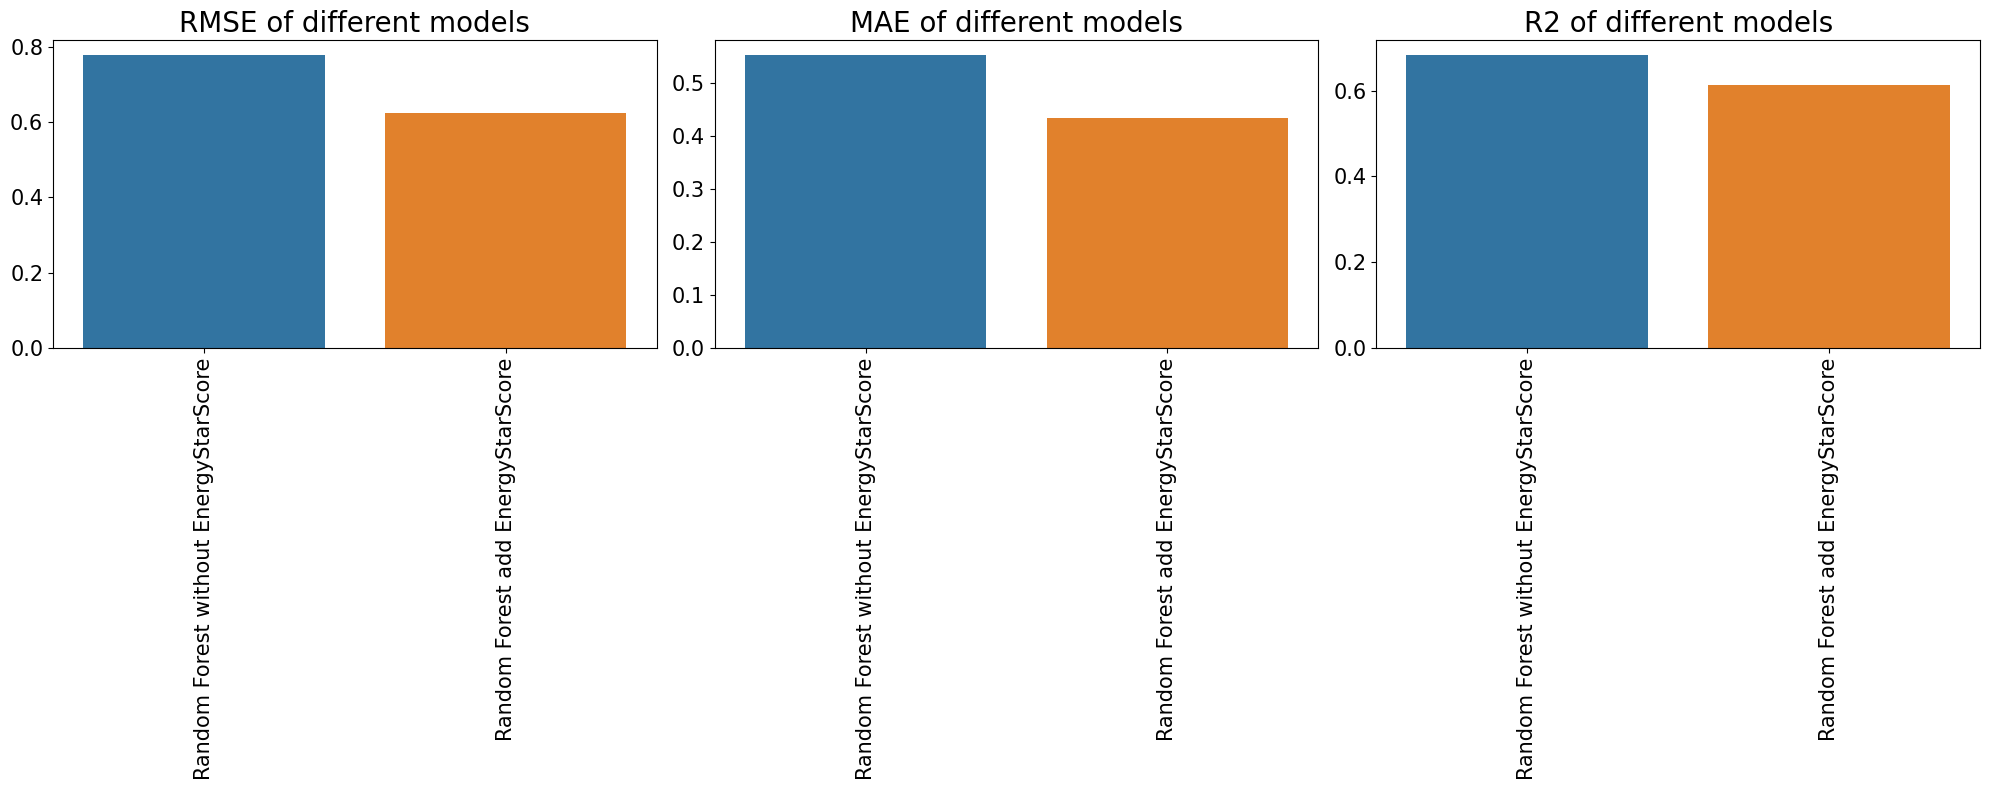

In [156]:
fig = plt.figure(figsize = (20, 8))
listeModeles = ['Random Forest without EnergyStarScore','Random Forest add EnergyStarScore']

listeMSE = [mse_rf, mse_rf_score]
listeRMSE = [i**(1/2) for i in listeMSE]

listeMAE = [mae_rf, mae_rf_score]

listeR2 = [r2_rf, r2_rf_score]

plt.subplot(1,3,1)
sns.barplot(x = listeModeles, y = listeRMSE)
plt.title('RMSE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,2)
sns.barplot(x = listeModeles, y = listeMAE)
plt.title('MAE of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

plt.subplot(1,3,3)
sns.barplot(x = listeModeles, y = listeR2)
plt.title('R2 of different models', fontsize = 20)
plt.xticks(rotation = 'vertical')
plt.tick_params(axis='both', which='major', labelsize=15)

fig.tight_layout()
plt.show()

Random Forest with EnergyStarScore produces less errors but less better R2.